# MTA Turnstile Data


Frist, we need to import the libraries that we will use in this notebook.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import math 
import random
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import datetime
%matplotlib inline
print("DONE")

DONE


Then, an empty SQL database has been created with the name "Oct_datas. dB". To make sure the database has been created I printed the table's name in the database but as shown below there are no tables yet.

In [2]:
engine = create_engine('sqlite:///data/Oct_datas.db' , echo = True)

all_tables = engine.table_names()
all_tables
# notice that it is empty becouse we did not add any table
# go to sqlite to import the tabels

2021-10-10 19:56:29,808 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2021-10-10 19:56:29,811 INFO sqlalchemy.engine.base.Engine ()
2021-10-10 19:56:29,815 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2021-10-10 19:56:29,818 INFO sqlalchemy.engine.base.Engine ()
2021-10-10 19:56:29,825 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2021-10-10 19:56:29,829 INFO sqlalchemy.engine.base.Engine ()


[]

After that, I went to SQLite Browser and open the created database to import 18 tables after I downloaded them from [MTA Turnstile Data](http://web.mta.info/developers/turnstile.html), these 18 tabels represent the data of October 2016, 2017, 2018.

To make sure that the tables were imported successfully I printed the name of the tables of the same database that were created before, and it is imported successfully as shown below.


In [3]:
# check that the tabels were added
all_tables = engine.table_names()
all_tables

2021-10-10 19:59:17,720 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2021-10-10 19:59:17,722 INFO sqlalchemy.engine.base.Engine ()


['turnstile_161001',
 'turnstile_161008',
 'turnstile_161015',
 'turnstile_161022',
 'turnstile_161029',
 'turnstile_161105',
 'turnstile_170930',
 'turnstile_171007',
 'turnstile_171014',
 'turnstile_171021',
 'turnstile_171028',
 'turnstile_171104',
 'turnstile_180929',
 'turnstile_181006',
 'turnstile_181013',
 'turnstile_181020',
 'turnstile_181027',
 'turnstile_181103']

Now the pandas Dataframe will be created by reading the SQL database that was created previously. Every 6 tables will be added together using (UNION) to represent the data of October for a single year. Then the data frame will be printed to make sure everything is ok.

In [4]:
data_2016 = pd.read_sql('select * from turnstile_161001 union select * from turnstile_161008 union select * from turnstile_161015 union select * from turnstile_161022 union select * from turnstile_161029 union select * from turnstile_161105;', engine)
data_2016 = pd.DataFrame(data_2016)

data_2016

2021-10-10 20:00:29,348 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("select * from turnstile_161001 union select * from turnstile_161008 union select * from turnstile_161015 union select * from turnstile_161022 union select * from turnstile_161029 union select * from turnstile_161105;")
2021-10-10 20:00:29,350 INFO sqlalchemy.engine.base.Engine ()
2021-10-10 20:00:29,353 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("select * from turnstile_161001 union select * from turnstile_161008 union select * from turnstile_161015 union select * from turnstile_161022 union select * from turnstile_161029 union select * from turnstile_161105;")
2021-10-10 20:00:29,354 INFO sqlalchemy.engine.base.Engine ()
2021-10-10 20:00:29,357 INFO sqlalchemy.engine.base.Engine select * from turnstile_161001 union select * from turnstile_161008 union select * from turnstile_161015 union select * from turnstile_161022 union select * from turnstile_161029 union select * from turnstile_1611

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,09/24/2016,00:00:00,REGULAR,5838478,1979173
1,A002,R051,02-00-00,59 ST,NQR456,BMT,09/24/2016,04:00:00,REGULAR,5838515,1979180
2,A002,R051,02-00-00,59 ST,NQR456,BMT,09/24/2016,08:00:00,REGULAR,5838530,1979220
3,A002,R051,02-00-00,59 ST,NQR456,BMT,09/24/2016,12:00:00,REGULAR,5838635,1979322
4,A002,R051,02-00-00,59 ST,NQR456,BMT,09/24/2016,16:00:00,REGULAR,5838951,1979397
...,...,...,...,...,...,...,...,...,...,...,...
1154897,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/04/2016,05:00:00,REGULAR,5554,276
1154898,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/04/2016,09:00:00,REGULAR,5554,276
1154899,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/04/2016,13:00:00,REGULAR,5554,276
1154900,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/04/2016,17:00:00,REGULAR,5554,276


In [5]:
data_2017 = pd.read_sql('select * from turnstile_170930 union select * from turnstile_171007 union select * from turnstile_171014 union select * from turnstile_171021 union select * from turnstile_171028 union select * from turnstile_171104;', engine)
data_2017 = pd.DataFrame(data_2017)

data_2017

2021-10-10 20:00:50,254 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("select * from turnstile_170930 union select * from turnstile_171007 union select * from turnstile_171014 union select * from turnstile_171021 union select * from turnstile_171028 union select * from turnstile_171104;")
2021-10-10 20:00:50,255 INFO sqlalchemy.engine.base.Engine ()
2021-10-10 20:00:50,257 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("select * from turnstile_170930 union select * from turnstile_171007 union select * from turnstile_171014 union select * from turnstile_171021 union select * from turnstile_171028 union select * from turnstile_171104;")
2021-10-10 20:00:50,259 INFO sqlalchemy.engine.base.Engine ()
2021-10-10 20:00:50,262 INFO sqlalchemy.engine.base.Engine select * from turnstile_170930 union select * from turnstile_171007 union select * from turnstile_171014 union select * from turnstile_171021 union select * from turnstile_171028 union select * from turnstile_1711

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/23/2017,00:00:00,REGULAR,6337411,2144541
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/23/2017,04:00:00,REGULAR,6337444,2144546
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/23/2017,08:00:00,REGULAR,6337466,2144580
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/23/2017,12:00:00,REGULAR,6337548,2144662
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/23/2017,16:00:00,REGULAR,6337774,2144728
...,...,...,...,...,...,...,...,...,...,...,...
1186212,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/25/2017,21:00:00,REGULAR,5554,321
1186213,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/26/2017,01:00:00,REGULAR,5554,321
1186214,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/26/2017,05:00:00,REGULAR,5554,321
1186215,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/26/2017,09:00:00,REGULAR,5554,321


In [6]:
data_2018 = pd.read_sql('select * from turnstile_180929 union select * from turnstile_181006 union select * from turnstile_181013 union select * from turnstile_181020 union select * from turnstile_181027 union select * from turnstile_181103;', engine)
data_2018 = pd.DataFrame(data_2018)

data_2018

2021-10-10 20:01:32,636 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("select * from turnstile_180929 union select * from turnstile_181006 union select * from turnstile_181013 union select * from turnstile_181020 union select * from turnstile_181027 union select * from turnstile_181103;")
2021-10-10 20:01:32,638 INFO sqlalchemy.engine.base.Engine ()
2021-10-10 20:01:32,878 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("select * from turnstile_180929 union select * from turnstile_181006 union select * from turnstile_181013 union select * from turnstile_181020 union select * from turnstile_181027 union select * from turnstile_181103;")
2021-10-10 20:01:32,879 INFO sqlalchemy.engine.base.Engine ()
2021-10-10 20:01:32,882 INFO sqlalchemy.engine.base.Engine select * from turnstile_180929 union select * from turnstile_181006 union select * from turnstile_181013 union select * from turnstile_181020 union select * from turnstile_181027 union select * from turnstile_1811

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/22/2018,00:00:00,REGULAR,6767488,2294227
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/22/2018,04:00:00,REGULAR,6767499,2294230
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/22/2018,08:00:00,REGULAR,6767517,2294258
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/22/2018,12:00:00,REGULAR,6767607,2294323
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/22/2018,16:00:00,REGULAR,6767790,2294368
...,...,...,...,...,...,...,...,...,...,...,...
1196471,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/26/2018,17:00:00,REGULAR,5554,365
1196472,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/26/2018,21:00:00,REGULAR,5554,365
1196473,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/27/2018,01:00:00,REGULAR,5554,365
1196474,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/27/2018,05:00:00,REGULAR,5554,365


To check if there are data of months other than October.

In [7]:
data_2016.DATE.value_counts().sort_index()

09/24/2016    27283
09/25/2016    27233
09/26/2016    27568
09/27/2016    28464
09/28/2016    27953
09/29/2016    27746
09/30/2016    27485
10/01/2016    27372
10/02/2016    27369
10/03/2016    27800
10/04/2016    27504
10/05/2016    28022
10/06/2016    27262
10/07/2016    27572
10/08/2016    27398
10/09/2016    27328
10/10/2016    27795
10/11/2016    27336
10/12/2016    27553
10/13/2016    27479
10/14/2016    27412
10/15/2016    27319
10/16/2016    27314
10/17/2016    27653
10/18/2016    27641
10/19/2016    27517
10/20/2016    27237
10/21/2016    27150
10/22/2016    27416
10/23/2016    27303
10/24/2016    28000
10/25/2016    27602
10/26/2016    27329
10/27/2016    27448
10/28/2016    27417
10/29/2016    27328
10/30/2016    27218
10/31/2016    27689
11/01/2016    27386
11/02/2016    27296
11/03/2016    27471
11/04/2016    27234
Name: DATE, dtype: int64

Creating a list that contains the three data frames, to avoid repeating the same instruction 3 times and to use for loop instead of that.

In [8]:
list_of_datas = [data_2016,data_2017,data_2018]
list_of_datas[0].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,09/24/2016,00:00:00,REGULAR,5838478,1979173
1,A002,R051,02-00-00,59 ST,NQR456,BMT,09/24/2016,04:00:00,REGULAR,5838515,1979180
2,A002,R051,02-00-00,59 ST,NQR456,BMT,09/24/2016,08:00:00,REGULAR,5838530,1979220
3,A002,R051,02-00-00,59 ST,NQR456,BMT,09/24/2016,12:00:00,REGULAR,5838635,1979322
4,A002,R051,02-00-00,59 ST,NQR456,BMT,09/24/2016,16:00:00,REGULAR,5838951,1979397


In [9]:
list_of_datas[1].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/23/2017,00:00:00,REGULAR,6337411,2144541
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/23/2017,04:00:00,REGULAR,6337444,2144546
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/23/2017,08:00:00,REGULAR,6337466,2144580
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/23/2017,12:00:00,REGULAR,6337548,2144662
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/23/2017,16:00:00,REGULAR,6337774,2144728


In [10]:
list_of_datas[2].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/22/2018,00:00:00,REGULAR,6767488,2294227
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/22/2018,04:00:00,REGULAR,6767499,2294230
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/22/2018,08:00:00,REGULAR,6767517,2294258
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/22/2018,12:00:00,REGULAR,6767607,2294323
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/22/2018,16:00:00,REGULAR,6767790,2294368


Printing the columns names for the three data frames.

In [11]:
for i in range(len(list_of_datas)):
    print(list_of_datas[i].columns)

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')
Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')
Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')


Striping the columns names (i did this step even while i dont see any space, to avoid any errors later).

In [12]:
for i in range(len(list_of_datas)):
    [column.strip() for column in list_of_datas[i].columns]

for i in range(len(list_of_datas)):
    print(list_of_datas[i].columns)    

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')
Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')
Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')


Now I will rename the C/A column to C_A.

In [13]:
data_2016_rename_C_A_column = data_2016.rename(columns = {'C/A': 'C_A'}, inplace = False)
data_2017_rename_C_A_column = data_2017.rename(columns = {'C/A': 'C_A'}, inplace = False)
data_2018_rename_C_A_column = data_2018.rename(columns = {'C/A': 'C_A'}, inplace = False)

data_2016_rename_C_A_column.head()

,C_A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,09/24/2016,00:00:00,REGULAR,5838478,1979173
1,A002,R051,02-00-00,59 ST,NQR456,BMT,09/24/2016,04:00:00,REGULAR,5838515,1979180
2,A002,R051,02-00-00,59 ST,NQR456,BMT,09/24/2016,08:00:00,REGULAR,5838530,1979220
3,A002,R051,02-00-00,59 ST,NQR456,BMT,09/24/2016,12:00:00,REGULAR,5838635,1979322
4,A002,R051,02-00-00,59 ST,NQR456,BMT,09/24/2016,16:00:00,REGULAR,5838951,1979397


In [14]:
data_2017_rename_C_A_column.head()

,C_A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/23/2017,00:00:00,REGULAR,6337411,2144541
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/23/2017,04:00:00,REGULAR,6337444,2144546
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/23/2017,08:00:00,REGULAR,6337466,2144580
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/23/2017,12:00:00,REGULAR,6337548,2144662
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/23/2017,16:00:00,REGULAR,6337774,2144728


In [15]:
data_2018_rename_C_A_column.head()

,C_A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/22/2018,00:00:00,REGULAR,6767488,2294227
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/22/2018,04:00:00,REGULAR,6767499,2294230
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/22/2018,08:00:00,REGULAR,6767517,2294258
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/22/2018,12:00:00,REGULAR,6767607,2294323
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/22/2018,16:00:00,REGULAR,6767790,2294368


I will add new column that contains the DATE and TIME at the same column.

In [16]:
data_2016_rename_C_A_column["DATE_TIME"] = pd.to_datetime(data_2016_rename_C_A_column.DATE + " " + data_2016_rename_C_A_column.TIME,format="%m/%d/%Y %H:%M:%S")
data_2017_rename_C_A_column["DATE_TIME"] = pd.to_datetime(data_2017_rename_C_A_column.DATE + " " + data_2017_rename_C_A_column.TIME,format="%m/%d/%Y %H:%M:%S")
data_2018_rename_C_A_column["DATE_TIME"] = pd.to_datetime(data_2018_rename_C_A_column.DATE + " " + data_2018_rename_C_A_column.TIME,format="%m/%d/%Y %H:%M:%S")

data_2016_rename_C_A_column.head()

,C_A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456,BMT,09/24/2016,00:00:00,REGULAR,5838478,1979173,2016-09-24 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456,BMT,09/24/2016,04:00:00,REGULAR,5838515,1979180,2016-09-24 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456,BMT,09/24/2016,08:00:00,REGULAR,5838530,1979220,2016-09-24 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456,BMT,09/24/2016,12:00:00,REGULAR,5838635,1979322,2016-09-24 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456,BMT,09/24/2016,16:00:00,REGULAR,5838951,1979397,2016-09-24 16:00:00


In [17]:
data_2017_rename_C_A_column.head()

,C_A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/23/2017,00:00:00,REGULAR,6337411,2144541,2017-09-23 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/23/2017,04:00:00,REGULAR,6337444,2144546,2017-09-23 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/23/2017,08:00:00,REGULAR,6337466,2144580,2017-09-23 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/23/2017,12:00:00,REGULAR,6337548,2144662,2017-09-23 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/23/2017,16:00:00,REGULAR,6337774,2144728,2017-09-23 16:00:00


In [18]:
data_2018_rename_C_A_column.head()

,C_A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/22/2018,00:00:00,REGULAR,6767488,2294227,2018-09-22 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/22/2018,04:00:00,REGULAR,6767499,2294230,2018-09-22 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/22/2018,08:00:00,REGULAR,6767517,2294258,2018-09-22 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/22/2018,12:00:00,REGULAR,6767607,2294323,2018-09-22 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/22/2018,16:00:00,REGULAR,6767790,2294368,2018-09-22 16:00:00


Now I will creat a new dataframe that contain only October and the last day of September (to be used later).

In [19]:
data_2016_Oct_only = data_2016_rename_C_A_column[(data_2016_rename_C_A_column["DATE_TIME"] >= "2016-9-30") & (data_2016_rename_C_A_column["DATE_TIME"] < "2016-11-1")]
data_2016_Oct_only.DATE.value_counts().sort_index()

09/30/2016    27485
10/01/2016    27372
10/02/2016    27369
10/03/2016    27800
10/04/2016    27504
10/05/2016    28022
10/06/2016    27262
10/07/2016    27572
10/08/2016    27398
10/09/2016    27328
10/10/2016    27795
10/11/2016    27336
10/12/2016    27553
10/13/2016    27479
10/14/2016    27412
10/15/2016    27319
10/16/2016    27314
10/17/2016    27653
10/18/2016    27641
10/19/2016    27517
10/20/2016    27237
10/21/2016    27150
10/22/2016    27416
10/23/2016    27303
10/24/2016    28000
10/25/2016    27602
10/26/2016    27329
10/27/2016    27448
10/28/2016    27417
10/29/2016    27328
10/30/2016    27218
10/31/2016    27689
Name: DATE, dtype: int64

In [20]:
data_2017_Oct_only = data_2017_rename_C_A_column[(data_2017_rename_C_A_column["DATE_TIME"] >= "2017-9-30") & (data_2017_rename_C_A_column["DATE_TIME"] < "2017-11-1")]
data_2017_Oct_only.DATE.value_counts().sort_index()

09/30/2017    27773
10/01/2017    27730
10/02/2017    27949
10/03/2017    27828
10/04/2017    28617
10/05/2017    28296
10/06/2017    28470
10/07/2017    28196
10/08/2017    28050
10/09/2017    28431
10/10/2017    28036
10/11/2017    28167
10/12/2017    28275
10/13/2017    28772
10/14/2017    28157
10/15/2017    28105
10/16/2017    28171
10/17/2017    28307
10/18/2017    28436
10/19/2017    28671
10/20/2017    28065
10/21/2017    28291
10/22/2017    28089
10/23/2017    28364
10/24/2017    28046
10/25/2017    28167
10/26/2017    28290
10/27/2017    28647
10/28/2017    28171
10/29/2017    28016
10/30/2017    28319
10/31/2017    28207
Name: DATE, dtype: int64

In [21]:
data_2018_Oct_only = data_2018_rename_C_A_column[(data_2018_rename_C_A_column["DATE_TIME"] >= "2018-9-30") & (data_2018_rename_C_A_column["DATE_TIME"] < "2018-11-1")]
data_2018_Oct_only.DATE.value_counts().sort_index()

09/30/2018    28204
10/01/2018    28213
10/02/2018    28666
10/03/2018    28870
10/04/2018    28196
10/05/2018    28503
10/06/2018    28307
10/07/2018    28074
10/08/2018    28308
10/09/2018    29416
10/10/2018    28511
10/11/2018    28880
10/12/2018    27947
10/13/2018    28138
10/14/2018    28024
10/15/2018    29237
10/16/2018    28094
10/17/2018    28780
10/18/2018    28136
10/19/2018    28192
10/20/2018    28114
10/21/2018    28160
10/22/2018    28980
10/23/2018    28967
10/24/2018    28574
10/25/2018    28821
10/26/2018    28422
10/27/2018    28291
10/28/2018    28279
10/29/2018    28612
10/30/2018    28383
10/31/2018    29163
Name: DATE, dtype: int64

Now I need to find the station that has the max number of turnstiles and to do so I will create a new data frame and add to it a new column that contains C_A, UNIT, SCP where all together represent one turnstile and I will use the data frame of 2018 because it is the most recent one.

In [22]:
data_turnstile_column = data_2018_Oct_only.copy()

data_turnstile_column["Per_turnstile"] = data_2018_Oct_only.C_A + " " + data_2018_Oct_only.UNIT + " " + data_2018_Oct_only.SCP
data_turnstile_column

,C_A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,Per_turnstile
48,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/30/2018,00:00:00,REGULAR,6776872,2297509,2018-09-30 00:00:00,A002 R051 02-00-00
49,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/30/2018,04:00:00,REGULAR,6776888,2297513,2018-09-30 04:00:00,A002 R051 02-00-00
50,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/30/2018,08:00:00,REGULAR,6776907,2297535,2018-09-30 08:00:00,A002 R051 02-00-00
51,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/30/2018,12:00:00,REGULAR,6776968,2297595,2018-09-30 12:00:00,A002 R051 02-00-00
52,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/30/2018,16:00:00,REGULAR,6777129,2297624,2018-09-30 16:00:00,A002 R051 02-00-00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196471,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/26/2018,17:00:00,REGULAR,5554,365,2018-10-26 17:00:00,TRAM2 R469 00-05-01
1196472,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/26/2018,21:00:00,REGULAR,5554,365,2018-10-26 21:00:00,TRAM2 R469 00-05-01
1196473,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/27/2018,01:00:00,REGULAR,5554,365,2018-10-27 01:00:00,TRAM2 R469 00-05-01
1196474,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/27/2018,05:00:00,REGULAR,5554,365,2018-10-27 05:00:00,TRAM2 R469 00-05-01


In [23]:
data_turnstile_column.STATION.value_counts().sort_index()

1 AV               1994
103 ST             2940
103 ST-CORONA      1753
104 ST             1725
110 ST             1154
                   ... 
WOODLAWN            965
WORLD TRADE CTR    3364
WTC-CORTLANDT      6901
YORK ST             576
ZEREGA AV          1152
Name: STATION, Length: 375, dtype: int64

There are 375 stations in 2018, and i want to find the station that has the maximum number of tuirnstiles.

In [24]:
data_turnstile_groupby = (data_turnstile_column
 .groupby(["STATION", "DATE_TIME"])
 .Per_turnstile.count()
 .reset_index()
 .sort_values("Per_turnstile", ascending=False))


data_top_10_station_turnstile = data_turnstile_groupby.groupby(["STATION"]).Per_turnstile.max().reset_index().sort_values("Per_turnstile", ascending=False).head(10)
data_top_10_station_turnstile

,STATION,Per_turnstile
60,34 ST-PENN STA,77
58,34 ST-HERALD SQ,54
177,CHAMBERS ST,54
82,59 ST,53
223,FULTON ST,51
349,TIMES SQ-42 ST,50
122,ATL AV-BARCLAY,48
83,59 ST COLUMBUS,41
107,86 ST,40
170,CANAL ST,39


The station that has the maximum number of turnstiles is 34 ST-PENN STA. as shown in the plot below.

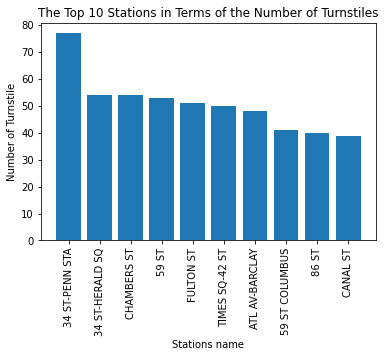

In [25]:
plt.bar(data_top_10_station_turnstile['STATION'], data_top_10_station_turnstile['Per_turnstile']);
plt.xticks(rotation = 90)
plt.ylabel("Number of Turnstile")
plt.xlabel("Stations name")
plt.title("The Top 10 Stations in Terms of the Number of Turnstiles");

plt.savefig('top_10_turnstiles.png')

C:\Users\ALI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


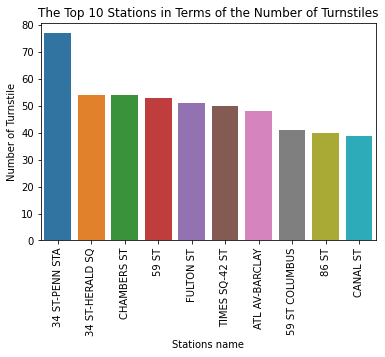

In [26]:
sns.barplot(data_top_10_station_turnstile['STATION'], data_top_10_station_turnstile['Per_turnstile']);
plt.xticks(rotation = 90)
plt.ylabel("Number of Turnstile")
plt.xlabel("Stations name")
plt.title("The Top 10 Stations in Terms of the Number of Turnstiles");

plt.savefig('top_10_turnstiles.png')

# part 2
now I will find the best time to do maintenance for a control area (group of turnstile) which is the time of the week that has the lowest traffic in (34 ST-PENN STA) station.

I need to continue cleaning the data frame and do the following steps:
- Check for NaN
- Drop duplicates
- Drop not needed columns
- Adjust the time to be exactly every 4 hours
- Find the daily entries and exits
- Check for outliers

In [27]:
data_2016_Oct_only[data_2016_Oct_only.isna()].count()

C_A          0
UNIT         0
SCP          0
STATION      0
LINENAME     0
DIVISION     0
DATE         0
TIME         0
DESC         0
ENTRIES      0
EXITS        0
DATE_TIME    0
dtype: int64

In [28]:
data_2017_Oct_only[data_2017_Oct_only.isna()].count()

C_A          0
UNIT         0
SCP          0
STATION      0
LINENAME     0
DIVISION     0
DATE         0
TIME         0
DESC         0
ENTRIES      0
EXITS        0
DATE_TIME    0
dtype: int64

In [29]:
data_2018_Oct_only[data_2018_Oct_only.isna()].count()

C_A          0
UNIT         0
SCP          0
STATION      0
LINENAME     0
DIVISION     0
DATE         0
TIME         0
DESC         0
ENTRIES      0
EXITS        0
DATE_TIME    0
dtype: int64

There is no NaN in the data frames.

Now we need to drop the duplicates if any.

In [30]:
data_2016_Oct_only.drop_duplicates(subset=["C_A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)
data_2016_Oct_only

<ipython-input-30-9f34ab9405fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2016_Oct_only.drop_duplicates(subset=["C_A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)


,C_A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
36,A002,R051,02-00-00,59 ST,NQR456,BMT,09/30/2016,00:00:00,REGULAR,5847126,1982350,2016-09-30 00:00:00
37,A002,R051,02-00-00,59 ST,NQR456,BMT,09/30/2016,04:00:00,REGULAR,5847149,1982354,2016-09-30 04:00:00
38,A002,R051,02-00-00,59 ST,NQR456,BMT,09/30/2016,08:00:00,REGULAR,5847196,1982468,2016-09-30 08:00:00
39,A002,R051,02-00-00,59 ST,NQR456,BMT,09/30/2016,12:00:00,REGULAR,5847383,1982743,2016-09-30 12:00:00
40,A002,R051,02-00-00,59 ST,NQR456,BMT,09/30/2016,16:00:00,REGULAR,5847748,1982831,2016-09-30 16:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
1154873,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/31/2016,08:27:57,REGULAR,5554,276,2016-10-31 08:27:57
1154874,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/31/2016,09:00:00,REGULAR,5554,276,2016-10-31 09:00:00
1154875,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/31/2016,13:00:00,REGULAR,5554,276,2016-10-31 13:00:00
1154876,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/31/2016,17:00:00,REGULAR,5554,276,2016-10-31 17:00:00


In [31]:
data_2017_Oct_only.drop_duplicates(subset=["C_A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)
data_2017_Oct_only

<ipython-input-31-1a09333c7af6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2017_Oct_only.drop_duplicates(subset=["C_A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)


,C_A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
42,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/30/2017,00:00:00,REGULAR,6346858,2147624,2017-09-30 00:00:00
43,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/30/2017,04:00:00,REGULAR,6346893,2147630,2017-09-30 04:00:00
44,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/30/2017,08:00:00,REGULAR,6346912,2147655,2017-09-30 08:00:00
45,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/30/2017,12:00:00,REGULAR,6347003,2147741,2017-09-30 12:00:00
46,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/30/2017,16:00:00,REGULAR,6347270,2147801,2017-09-30 16:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
1186212,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/25/2017,21:00:00,REGULAR,5554,321,2017-10-25 21:00:00
1186213,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/26/2017,01:00:00,REGULAR,5554,321,2017-10-26 01:00:00
1186214,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/26/2017,05:00:00,REGULAR,5554,321,2017-10-26 05:00:00
1186215,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/26/2017,09:00:00,REGULAR,5554,321,2017-10-26 09:00:00


In [32]:
data_2018_Oct_only.drop_duplicates(subset=["C_A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)
data_2018_Oct_only

<ipython-input-32-c3c37b5a333c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2018_Oct_only.drop_duplicates(subset=["C_A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)


,C_A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
48,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/30/2018,00:00:00,REGULAR,6776872,2297509,2018-09-30 00:00:00
49,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/30/2018,04:00:00,REGULAR,6776888,2297513,2018-09-30 04:00:00
50,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/30/2018,08:00:00,REGULAR,6776907,2297535,2018-09-30 08:00:00
51,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/30/2018,12:00:00,REGULAR,6776968,2297595,2018-09-30 12:00:00
52,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/30/2018,16:00:00,REGULAR,6777129,2297624,2018-09-30 16:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
1196471,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/26/2018,17:00:00,REGULAR,5554,365,2018-10-26 17:00:00
1196472,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/26/2018,21:00:00,REGULAR,5554,365,2018-10-26 21:00:00
1196473,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/27/2018,01:00:00,REGULAR,5554,365,2018-10-27 01:00:00
1196474,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/27/2018,05:00:00,REGULAR,5554,365,2018-10-27 05:00:00


In my analysis i will not need the columns LINENAME, DIVISION, DESC. therfore i will drop them

In [33]:
data_2016_Oct_only_droped = data_2016_Oct_only.drop(["LINENAME","DIVISION","DESC"], axis=1, errors="ignore")
data_2017_Oct_only_droped = data_2017_Oct_only.drop(["LINENAME","DIVISION","DESC"], axis=1, errors="ignore")
data_2018_Oct_only_droped = data_2018_Oct_only.drop(["LINENAME","DIVISION","DESC"], axis=1, errors="ignore")

data_2018_Oct_only_droped

,C_A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,DATE_TIME
48,A002,R051,02-00-00,59 ST,09/30/2018,00:00:00,6776872,2297509,2018-09-30 00:00:00
49,A002,R051,02-00-00,59 ST,09/30/2018,04:00:00,6776888,2297513,2018-09-30 04:00:00
50,A002,R051,02-00-00,59 ST,09/30/2018,08:00:00,6776907,2297535,2018-09-30 08:00:00
51,A002,R051,02-00-00,59 ST,09/30/2018,12:00:00,6776968,2297595,2018-09-30 12:00:00
52,A002,R051,02-00-00,59 ST,09/30/2018,16:00:00,6777129,2297624,2018-09-30 16:00:00
...,...,...,...,...,...,...,...,...,...
1196471,TRAM2,R469,00-05-01,RIT-ROOSEVELT,10/26/2018,17:00:00,5554,365,2018-10-26 17:00:00
1196472,TRAM2,R469,00-05-01,RIT-ROOSEVELT,10/26/2018,21:00:00,5554,365,2018-10-26 21:00:00
1196473,TRAM2,R469,00-05-01,RIT-ROOSEVELT,10/27/2018,01:00:00,5554,365,2018-10-27 01:00:00
1196474,TRAM2,R469,00-05-01,RIT-ROOSEVELT,10/27/2018,05:00:00,5554,365,2018-10-27 05:00:00


In [34]:
data_2017_Oct_only_droped[data_2017_Oct_only_droped.duplicated()]

,C_A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,DATE_TIME


There is a problem with the time in the data where the time is not taken every 4 hours exactly, and to overcome this problem i will sum round 2 hours befor and 2 hours afret. ex, the time from 02:00:00 to 06:00:00 will be replaced by 04:00:00 and so on.

In [35]:
data_2016_Oct_only_droped.TIME.value_counts().sort_index()

00:00:00    77121
00:00:03        1
00:00:04        1
00:00:05        1
00:00:12        2
            ...  
23:59:46        2
23:59:47        1
23:59:50        5
23:59:57        1
23:59:58        1
Name: TIME, Length: 28256, dtype: int64

In [36]:
data_2016_Oct_only_droped['NEW_TIME'] = data_2016_Oct_only_droped['TIME'].apply(lambda x: '04:00:00' if ('02:00:00' < x <= '06:00:00')
                                                                  else '08:00:00' if ('06:00:00' < x <= '10:00:00') 
                                                                  else '12:00:00' if ('10:00:00' < x <= '14:00:00') 
                                                                  else '16:00:00' if ('14:00:00' < x <= '18:00:00')
                                                                  else '20:00:00' if ('18:00:00' < x <= '22:00:00')
                                                                  else '00:00:00')
data_2016_Oct_only_droped

,C_A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,NEW_TIME
36,A002,R051,02-00-00,59 ST,09/30/2016,00:00:00,5847126,1982350,2016-09-30 00:00:00,00:00:00
37,A002,R051,02-00-00,59 ST,09/30/2016,04:00:00,5847149,1982354,2016-09-30 04:00:00,04:00:00
38,A002,R051,02-00-00,59 ST,09/30/2016,08:00:00,5847196,1982468,2016-09-30 08:00:00,08:00:00
39,A002,R051,02-00-00,59 ST,09/30/2016,12:00:00,5847383,1982743,2016-09-30 12:00:00,12:00:00
40,A002,R051,02-00-00,59 ST,09/30/2016,16:00:00,5847748,1982831,2016-09-30 16:00:00,16:00:00
...,...,...,...,...,...,...,...,...,...,...
1154873,TRAM2,R469,00-05-01,RIT-ROOSEVELT,10/31/2016,08:27:57,5554,276,2016-10-31 08:27:57,08:00:00
1154874,TRAM2,R469,00-05-01,RIT-ROOSEVELT,10/31/2016,09:00:00,5554,276,2016-10-31 09:00:00,08:00:00
1154875,TRAM2,R469,00-05-01,RIT-ROOSEVELT,10/31/2016,13:00:00,5554,276,2016-10-31 13:00:00,12:00:00
1154876,TRAM2,R469,00-05-01,RIT-ROOSEVELT,10/31/2016,17:00:00,5554,276,2016-10-31 17:00:00,16:00:00


In [37]:
data_2017_Oct_only_droped['NEW_TIME'] = data_2017_Oct_only_droped['TIME'].apply(lambda x: '04:00:00' if ('02:00:00' < x <= '06:00:00')
                                                                  else '08:00:00' if ('06:00:00' < x <= '10:00:00') 
                                                                  else '12:00:00' if ('10:00:00' < x <= '14:00:00') 
                                                                  else '16:00:00' if ('14:00:00' < x <= '18:00:00')
                                                                  else '20:00:00' if ('18:00:00' < x <= '22:00:00')
                                                                  else '00:00:00')
data_2017_Oct_only_droped

,C_A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,NEW_TIME
42,A002,R051,02-00-00,59 ST,09/30/2017,00:00:00,6346858,2147624,2017-09-30 00:00:00,00:00:00
43,A002,R051,02-00-00,59 ST,09/30/2017,04:00:00,6346893,2147630,2017-09-30 04:00:00,04:00:00
44,A002,R051,02-00-00,59 ST,09/30/2017,08:00:00,6346912,2147655,2017-09-30 08:00:00,08:00:00
45,A002,R051,02-00-00,59 ST,09/30/2017,12:00:00,6347003,2147741,2017-09-30 12:00:00,12:00:00
46,A002,R051,02-00-00,59 ST,09/30/2017,16:00:00,6347270,2147801,2017-09-30 16:00:00,16:00:00
...,...,...,...,...,...,...,...,...,...,...
1186212,TRAM2,R469,00-05-01,RIT-ROOSEVELT,10/25/2017,21:00:00,5554,321,2017-10-25 21:00:00,20:00:00
1186213,TRAM2,R469,00-05-01,RIT-ROOSEVELT,10/26/2017,01:00:00,5554,321,2017-10-26 01:00:00,00:00:00
1186214,TRAM2,R469,00-05-01,RIT-ROOSEVELT,10/26/2017,05:00:00,5554,321,2017-10-26 05:00:00,04:00:00
1186215,TRAM2,R469,00-05-01,RIT-ROOSEVELT,10/26/2017,09:00:00,5554,321,2017-10-26 09:00:00,08:00:00


In [38]:
data_2018_Oct_only_droped['NEW_TIME'] = data_2018_Oct_only_droped['TIME'].apply(lambda x: '04:00:00' if ('02:00:00' < x <= '06:00:00')
                                                                  else '08:00:00' if ('06:00:00' < x <= '10:00:00') 
                                                                  else '12:00:00' if ('10:00:00' < x <= '14:00:00') 
                                                                  else '16:00:00' if ('14:00:00' < x <= '18:00:00')
                                                                  else '20:00:00' if ('18:00:00' < x <= '22:00:00')
                                                                  else '00:00:00')
data_2018_Oct_only_droped

,C_A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,NEW_TIME
48,A002,R051,02-00-00,59 ST,09/30/2018,00:00:00,6776872,2297509,2018-09-30 00:00:00,00:00:00
49,A002,R051,02-00-00,59 ST,09/30/2018,04:00:00,6776888,2297513,2018-09-30 04:00:00,04:00:00
50,A002,R051,02-00-00,59 ST,09/30/2018,08:00:00,6776907,2297535,2018-09-30 08:00:00,08:00:00
51,A002,R051,02-00-00,59 ST,09/30/2018,12:00:00,6776968,2297595,2018-09-30 12:00:00,12:00:00
52,A002,R051,02-00-00,59 ST,09/30/2018,16:00:00,6777129,2297624,2018-09-30 16:00:00,16:00:00
...,...,...,...,...,...,...,...,...,...,...
1196471,TRAM2,R469,00-05-01,RIT-ROOSEVELT,10/26/2018,17:00:00,5554,365,2018-10-26 17:00:00,16:00:00
1196472,TRAM2,R469,00-05-01,RIT-ROOSEVELT,10/26/2018,21:00:00,5554,365,2018-10-26 21:00:00,20:00:00
1196473,TRAM2,R469,00-05-01,RIT-ROOSEVELT,10/27/2018,01:00:00,5554,365,2018-10-27 01:00:00,00:00:00
1196474,TRAM2,R469,00-05-01,RIT-ROOSEVELT,10/27/2018,05:00:00,5554,365,2018-10-27 05:00:00,04:00:00


Fix the DATE_TIME column for the data frames

In [39]:
data_2016_Oct_only_droped["DATE_TIME"] = pd.to_datetime(data_2016_Oct_only_droped.DATE + " " + data_2016_Oct_only_droped.NEW_TIME,format="%m/%d/%Y %H:%M:%S")
data_2017_Oct_only_droped["DATE_TIME"] = pd.to_datetime(data_2017_Oct_only_droped.DATE + " " + data_2017_Oct_only_droped.NEW_TIME,format="%m/%d/%Y %H:%M:%S")
data_2018_Oct_only_droped["DATE_TIME"] = pd.to_datetime(data_2018_Oct_only_droped.DATE + " " + data_2018_Oct_only_droped.NEW_TIME,format="%m/%d/%Y %H:%M:%S")

data_2017_Oct_only_droped

,C_A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,NEW_TIME
42,A002,R051,02-00-00,59 ST,09/30/2017,00:00:00,6346858,2147624,2017-09-30 00:00:00,00:00:00
43,A002,R051,02-00-00,59 ST,09/30/2017,04:00:00,6346893,2147630,2017-09-30 04:00:00,04:00:00
44,A002,R051,02-00-00,59 ST,09/30/2017,08:00:00,6346912,2147655,2017-09-30 08:00:00,08:00:00
45,A002,R051,02-00-00,59 ST,09/30/2017,12:00:00,6347003,2147741,2017-09-30 12:00:00,12:00:00
46,A002,R051,02-00-00,59 ST,09/30/2017,16:00:00,6347270,2147801,2017-09-30 16:00:00,16:00:00
...,...,...,...,...,...,...,...,...,...,...
1186212,TRAM2,R469,00-05-01,RIT-ROOSEVELT,10/25/2017,21:00:00,5554,321,2017-10-25 20:00:00,20:00:00
1186213,TRAM2,R469,00-05-01,RIT-ROOSEVELT,10/26/2017,01:00:00,5554,321,2017-10-26 00:00:00,00:00:00
1186214,TRAM2,R469,00-05-01,RIT-ROOSEVELT,10/26/2017,05:00:00,5554,321,2017-10-26 04:00:00,04:00:00
1186215,TRAM2,R469,00-05-01,RIT-ROOSEVELT,10/26/2017,09:00:00,5554,321,2017-10-26 08:00:00,08:00:00


In [40]:
data_2018_Oct_only_droped

,C_A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,NEW_TIME
48,A002,R051,02-00-00,59 ST,09/30/2018,00:00:00,6776872,2297509,2018-09-30 00:00:00,00:00:00
49,A002,R051,02-00-00,59 ST,09/30/2018,04:00:00,6776888,2297513,2018-09-30 04:00:00,04:00:00
50,A002,R051,02-00-00,59 ST,09/30/2018,08:00:00,6776907,2297535,2018-09-30 08:00:00,08:00:00
51,A002,R051,02-00-00,59 ST,09/30/2018,12:00:00,6776968,2297595,2018-09-30 12:00:00,12:00:00
52,A002,R051,02-00-00,59 ST,09/30/2018,16:00:00,6777129,2297624,2018-09-30 16:00:00,16:00:00
...,...,...,...,...,...,...,...,...,...,...
1196471,TRAM2,R469,00-05-01,RIT-ROOSEVELT,10/26/2018,17:00:00,5554,365,2018-10-26 16:00:00,16:00:00
1196472,TRAM2,R469,00-05-01,RIT-ROOSEVELT,10/26/2018,21:00:00,5554,365,2018-10-26 20:00:00,20:00:00
1196473,TRAM2,R469,00-05-01,RIT-ROOSEVELT,10/27/2018,01:00:00,5554,365,2018-10-27 00:00:00,00:00:00
1196474,TRAM2,R469,00-05-01,RIT-ROOSEVELT,10/27/2018,05:00:00,5554,365,2018-10-27 04:00:00,04:00:00


Since the maintinace will be made only on (34 ST-PENN STA) Station, so i dont need the data of other stations

In [41]:
data_2016_34ST_station = data_2016_Oct_only_droped[(data_2016_Oct_only_droped.STATION == "34 ST-PENN STA")]
data_2017_34ST_station = data_2017_Oct_only_droped[(data_2017_Oct_only_droped.STATION == "34 ST-PENN STA")]
data_2018_34ST_station = data_2018_Oct_only_droped[(data_2018_Oct_only_droped.STATION == "34 ST-PENN STA")]

data_2018_34ST_station

,C_A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,NEW_TIME
307398,N067,R012,00-00-00,34 ST-PENN STA,09/30/2018,00:00:00,2111579,2244395,2018-09-30 00:00:00,00:00:00
307399,N067,R012,00-00-00,34 ST-PENN STA,09/30/2018,04:00:00,2111584,2244410,2018-09-30 04:00:00,04:00:00
307400,N067,R012,00-00-00,34 ST-PENN STA,09/30/2018,08:00:00,2111592,2244445,2018-09-30 08:00:00,08:00:00
307401,N067,R012,00-00-00,34 ST-PENN STA,09/30/2018,12:00:00,2111645,2244609,2018-09-30 12:00:00,12:00:00
307402,N067,R012,00-00-00,34 ST-PENN STA,09/30/2018,16:00:00,2111708,2244779,2018-09-30 16:00:00,16:00:00
...,...,...,...,...,...,...,...,...,...,...
798384,R142,R293,01-06-01,34 ST-PENN STA,10/31/2018,18:00:00,67747749,18090904,2018-10-31 16:00:00,16:00:00
798385,R142,R293,01-06-01,34 ST-PENN STA,10/31/2018,18:22:37,67747779,18090941,2018-10-31 20:00:00,20:00:00
798386,R142,R293,01-06-01,34 ST-PENN STA,10/31/2018,18:23:57,67747781,18090943,2018-10-31 20:00:00,20:00:00
798387,R142,R293,01-06-01,34 ST-PENN STA,10/31/2018,18:25:17,67747785,18090944,2018-10-31 20:00:00,20:00:00


In [42]:
data_2016_34ST_station.nunique()

C_A             13
UNIT             4
SCP             58
STATION          1
DATE            32
TIME            29
ENTRIES      17455
EXITS        17351
DATE_TIME      192
NEW_TIME         6
dtype: int64

In [43]:
data_2017_34ST_station.nunique()

C_A             13
UNIT             4
SCP             58
STATION          1
DATE            32
TIME            38
ENTRIES      17286
EXITS        17203
DATE_TIME      192
NEW_TIME         6
dtype: int64

In [44]:
data_2018_34ST_station.nunique()

C_A             13
UNIT             4
SCP             61
STATION          1
DATE            32
TIME            85
ENTRIES      17166
EXITS        17282
DATE_TIME      192
NEW_TIME         6
dtype: int64

From the above, we can see that there were 3 turnstiles added to the station in 2018. But the number of control areas is the same from 2016 to 2018 which we are aiming to analyze.

In [45]:
data_2018_34ST_station.C_A.value_counts().sort_index()

N067    2910
N068     768
N069     768
N070    1372
N071    1152
N072    2167
N073    1737
R135    1146
R137     563
R138    2995
R139     953
R141    1318
R142    1186
Name: C_A, dtype: int64

The 13 controle areas that we need to analyze are above.

In [46]:
data_2016_34ST_station.ENTRIES.value_counts().sort_index()

0             196
3718            2
3719            8
3720           11
3721            2
             ... 
1568605373      1
1568605528      1
1568605567      1
1568605593      1
1568605610      1
Name: ENTRIES, Length: 17455, dtype: int64

Adding the number of entries of the privios reading of the data to find the number of entries and exits every 4 hours.

data_2016_34ST_station_daily = (data_2016_34ST_station
                        .groupby(["C_A", "UNIT", "SCP", "STATION", "DATE_TIME"],as_index=False)
                        .ENTRIES.first())

data_2017_34ST_station_daily = (data_2017_34ST_station
                        .groupby(["C_A", "UNIT", "SCP", "STATION", "DATE_TIME"],as_index=False)
                        .ENTRIES.first())

data_2018_34ST_station_daily = (data_2018_34ST_station
                        .groupby(["C_A", "UNIT", "SCP", "STATION", "DATE_TIME"],as_index=False)
                        .ENTRIES.first())
                                


In [47]:
data_2016_34ST_station_daily_EXITS = (data_2016_34ST_station
                        .groupby(["C_A", "UNIT", "SCP", "STATION", "DATE_TIME"],as_index=False)
                        .EXITS.first())

data_2016_34ST_station_daily_ENTRIS = (data_2016_34ST_station
                        .groupby(["C_A", "UNIT", "SCP", "STATION", "DATE_TIME"],as_index=False)
                        .ENTRIES.first())

data_2016_34ST_station_daily_EX_EN = pd.merge(data_2016_34ST_station_daily_ENTRIS, data_2016_34ST_station_daily_EXITS, on=["DATE_TIME","C_A","UNIT","SCP","STATION"])
data_2016_34ST_station_daily_EX_EN

,C_A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,EXITS
0,N067,R012,00-00-00,34 ST-PENN STA,2016-09-30 00:00:00,1700243,1269414
1,N067,R012,00-00-00,34 ST-PENN STA,2016-09-30 04:00:00,1700249,1269414
2,N067,R012,00-00-00,34 ST-PENN STA,2016-09-30 08:00:00,1700453,1269547
3,N067,R012,00-00-00,34 ST-PENN STA,2016-09-30 12:00:00,1700803,1269995
4,N067,R012,00-00-00,34 ST-PENN STA,2016-09-30 16:00:00,1700878,1270152
...,...,...,...,...,...,...,...
18785,R142,R293,01-06-01,34 ST-PENN STA,2016-10-31 04:00:00,67250492,17072309
18786,R142,R293,01-06-01,34 ST-PENN STA,2016-10-31 08:00:00,67250600,17072975
18787,R142,R293,01-06-01,34 ST-PENN STA,2016-10-31 12:00:00,67250746,17073374
18788,R142,R293,01-06-01,34 ST-PENN STA,2016-10-31 16:00:00,67251053,17073697


In [48]:
data_2017_34ST_station_daily_EXITS = (data_2017_34ST_station
                        .groupby(["C_A", "UNIT", "SCP", "STATION", "DATE_TIME"],as_index=False)
                        .EXITS.first())

data_2017_34ST_station_daily_ENTRIS = (data_2017_34ST_station
                        .groupby(["C_A", "UNIT", "SCP", "STATION", "DATE_TIME"],as_index=False)
                        .ENTRIES.first())

data_2017_34ST_station_daily_EX_EN = pd.merge(data_2017_34ST_station_daily_ENTRIS, data_2017_34ST_station_daily_EXITS, on=["DATE_TIME","C_A","UNIT","SCP","STATION"])
data_2017_34ST_station_daily_EX_EN

,C_A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,EXITS
0,N067,R012,00-00-00,34 ST-PENN STA,2017-09-30 00:00:00,1890277,1698204
1,N067,R012,00-00-00,34 ST-PENN STA,2017-09-30 04:00:00,1890283,1698217
2,N067,R012,00-00-00,34 ST-PENN STA,2017-09-30 08:00:00,1890295,1698304
3,N067,R012,00-00-00,34 ST-PENN STA,2017-09-30 12:00:00,1890365,1698520
4,N067,R012,00-00-00,34 ST-PENN STA,2017-09-30 16:00:00,1890487,1698885
...,...,...,...,...,...,...,...
18746,R142,R293,01-06-01,34 ST-PENN STA,2017-10-31 04:00:00,67508190,17618425
18747,R142,R293,01-06-01,34 ST-PENN STA,2017-10-31 08:00:00,67508287,17619017
18748,R142,R293,01-06-01,34 ST-PENN STA,2017-10-31 12:00:00,67508439,17619413
18749,R142,R293,01-06-01,34 ST-PENN STA,2017-10-31 16:00:00,67508685,17619771


In [49]:
data_2018_34ST_station_daily_EXITS = (data_2018_34ST_station
                        .groupby(["C_A", "UNIT", "SCP", "STATION", "DATE_TIME"],as_index=False)
                        .EXITS.first())

data_2018_34ST_station_daily_ENTRIS = (data_2018_34ST_station
                        .groupby(["C_A", "UNIT", "SCP", "STATION", "DATE_TIME"],as_index=False)
                        .ENTRIES.first())

data_2018_34ST_station_daily_EX_EN = pd.merge(data_2018_34ST_station_daily_ENTRIS, data_2018_34ST_station_daily_EXITS, on=["DATE_TIME","C_A","UNIT","SCP","STATION"])
data_2018_34ST_station_daily_EX_EN

,C_A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,EXITS
0,N067,R012,00-00-00,34 ST-PENN STA,2018-09-30 00:00:00,2111579,2244395
1,N067,R012,00-00-00,34 ST-PENN STA,2018-09-30 04:00:00,2111584,2244410
2,N067,R012,00-00-00,34 ST-PENN STA,2018-09-30 08:00:00,2111592,2244445
3,N067,R012,00-00-00,34 ST-PENN STA,2018-09-30 12:00:00,2111645,2244609
4,N067,R012,00-00-00,34 ST-PENN STA,2018-09-30 16:00:00,2111708,2244779
...,...,...,...,...,...,...,...
18272,R142,R293,01-06-01,34 ST-PENN STA,2018-10-31 04:00:00,67747247,18089482
18273,R142,R293,01-06-01,34 ST-PENN STA,2018-10-31 08:00:00,67747351,18090093
18274,R142,R293,01-06-01,34 ST-PENN STA,2018-10-31 12:00:00,67747501,18090503
18275,R142,R293,01-06-01,34 ST-PENN STA,2018-10-31 16:00:00,67747749,18090904


In [50]:
data_2016_34ST_station

,C_A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,NEW_TIME
302356,N067,R012,00-00-00,34 ST-PENN STA,09/30/2016,00:00:00,1700243,1269414,2016-09-30 00:00:00,00:00:00
302357,N067,R012,00-00-00,34 ST-PENN STA,09/30/2016,04:00:00,1700249,1269414,2016-09-30 04:00:00,04:00:00
302358,N067,R012,00-00-00,34 ST-PENN STA,09/30/2016,08:00:00,1700453,1269547,2016-09-30 08:00:00,08:00:00
302359,N067,R012,00-00-00,34 ST-PENN STA,09/30/2016,12:00:00,1700803,1269995,2016-09-30 12:00:00,12:00:00
302360,N067,R012,00-00-00,34 ST-PENN STA,09/30/2016,16:00:00,1700878,1270152,2016-09-30 16:00:00,16:00:00
...,...,...,...,...,...,...,...,...,...,...
758056,R142,R293,01-06-01,34 ST-PENN STA,10/31/2016,06:00:00,67250492,17072309,2016-10-31 04:00:00,04:00:00
758057,R142,R293,01-06-01,34 ST-PENN STA,10/31/2016,10:00:00,67250600,17072975,2016-10-31 08:00:00,08:00:00
758058,R142,R293,01-06-01,34 ST-PENN STA,10/31/2016,14:00:00,67250746,17073374,2016-10-31 12:00:00,12:00:00
758059,R142,R293,01-06-01,34 ST-PENN STA,10/31/2016,18:00:00,67251053,17073697,2016-10-31 16:00:00,16:00:00


In [51]:
data_2018_34ST_station

,C_A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,NEW_TIME
307398,N067,R012,00-00-00,34 ST-PENN STA,09/30/2018,00:00:00,2111579,2244395,2018-09-30 00:00:00,00:00:00
307399,N067,R012,00-00-00,34 ST-PENN STA,09/30/2018,04:00:00,2111584,2244410,2018-09-30 04:00:00,04:00:00
307400,N067,R012,00-00-00,34 ST-PENN STA,09/30/2018,08:00:00,2111592,2244445,2018-09-30 08:00:00,08:00:00
307401,N067,R012,00-00-00,34 ST-PENN STA,09/30/2018,12:00:00,2111645,2244609,2018-09-30 12:00:00,12:00:00
307402,N067,R012,00-00-00,34 ST-PENN STA,09/30/2018,16:00:00,2111708,2244779,2018-09-30 16:00:00,16:00:00
...,...,...,...,...,...,...,...,...,...,...
798384,R142,R293,01-06-01,34 ST-PENN STA,10/31/2018,18:00:00,67747749,18090904,2018-10-31 16:00:00,16:00:00
798385,R142,R293,01-06-01,34 ST-PENN STA,10/31/2018,18:22:37,67747779,18090941,2018-10-31 20:00:00,20:00:00
798386,R142,R293,01-06-01,34 ST-PENN STA,10/31/2018,18:23:57,67747781,18090943,2018-10-31 20:00:00,20:00:00
798387,R142,R293,01-06-01,34 ST-PENN STA,10/31/2018,18:25:17,67747785,18090944,2018-10-31 20:00:00,20:00:00


In [52]:
data_2016_34ST_station_daily_EX_EN[["PREV_DATE", "PREV_ENTRIES","PREV_EXITS"]] = (data_2016_34ST_station_daily_EX_EN
                                                       .groupby(["C_A", "UNIT", "SCP", "STATION"])["DATE_TIME", "ENTRIES","EXITS"]
                                                       .apply(lambda grp: grp.shift(1)))

data_2017_34ST_station_daily_EX_EN[["PREV_DATE", "PREV_ENTRIES","PREV_EXITS"]] = (data_2017_34ST_station_daily_EX_EN
                                                       .groupby(["C_A", "UNIT", "SCP", "STATION"])["DATE_TIME", "ENTRIES","EXITS"]
                                                       .apply(lambda grp: grp.shift(1)))

data_2018_34ST_station_daily_EX_EN[["PREV_DATE", "PREV_ENTRIES","PREV_EXITS"]] = (data_2018_34ST_station_daily_EX_EN
                                                       .groupby(["C_A", "UNIT", "SCP", "STATION"])["DATE_TIME", "ENTRIES","EXITS"]
                                                       .apply(lambda grp: grp.shift(1)))

data_2018_34ST_station_daily_EX_EN

<ipython-input-52-af819c0a5dac>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_2016_34ST_station_daily_EX_EN[["PREV_DATE", "PREV_ENTRIES","PREV_EXITS"]] = (data_2016_34ST_station_daily_EX_EN
<ipython-input-52-af819c0a5dac>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_2017_34ST_station_daily_EX_EN[["PREV_DATE", "PREV_ENTRIES","PREV_EXITS"]] = (data_2017_34ST_station_daily_EX_EN
<ipython-input-52-af819c0a5dac>:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_2018_34ST_station_daily_EX_EN[["PREV_DATE", "PREV_ENTRIES","PREV_EXITS"]] = (data_2018_34ST_station_daily_EX_EN


,C_A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS
0,N067,R012,00-00-00,34 ST-PENN STA,2018-09-30 00:00:00,2111579,2244395,NaT,NaN,NaN
1,N067,R012,00-00-00,34 ST-PENN STA,2018-09-30 04:00:00,2111584,2244410,2018-09-30 00:00:00,2111579.0,2244395.0
2,N067,R012,00-00-00,34 ST-PENN STA,2018-09-30 08:00:00,2111592,2244445,2018-09-30 04:00:00,2111584.0,2244410.0
3,N067,R012,00-00-00,34 ST-PENN STA,2018-09-30 12:00:00,2111645,2244609,2018-09-30 08:00:00,2111592.0,2244445.0
4,N067,R012,00-00-00,34 ST-PENN STA,2018-09-30 16:00:00,2111708,2244779,2018-09-30 12:00:00,2111645.0,2244609.0
...,...,...,...,...,...,...,...,...,...,...
18272,R142,R293,01-06-01,34 ST-PENN STA,2018-10-31 04:00:00,67747247,18089482,2018-10-31 00:00:00,67747243.0,18089458.0
18273,R142,R293,01-06-01,34 ST-PENN STA,2018-10-31 08:00:00,67747351,18090093,2018-10-31 04:00:00,67747247.0,18089482.0
18274,R142,R293,01-06-01,34 ST-PENN STA,2018-10-31 12:00:00,67747501,18090503,2018-10-31 08:00:00,67747351.0,18090093.0
18275,R142,R293,01-06-01,34 ST-PENN STA,2018-10-31 16:00:00,67747749,18090904,2018-10-31 12:00:00,67747501.0,18090503.0


Excloding the dates of other monthes

In [53]:
data_2016_34ST_station_daily_EX_EN = data_2016_34ST_station_daily_EX_EN[(data_2016_34ST_station_daily_EX_EN.DATE_TIME > "2016-09-30 20:00:00")]
data_2017_34ST_station_daily_EX_EN = data_2017_34ST_station_daily_EX_EN[(data_2017_34ST_station_daily_EX_EN.DATE_TIME > "2017-09-30 20:00:00")]
data_2018_34ST_station_daily_EX_EN = data_2018_34ST_station_daily_EX_EN[(data_2018_34ST_station_daily_EX_EN.DATE_TIME > "2018-09-30 20:00:00")]

data_2018_34ST_station_daily_EX_EN

,C_A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS
6,N067,R012,00-00-00,34 ST-PENN STA,2018-10-01 00:00:00,2111825,2244980,2018-09-30 20:00:00,2111786.0,2244911.0
7,N067,R012,00-00-00,34 ST-PENN STA,2018-10-01 04:00:00,2111828,2244986,2018-10-01 00:00:00,2111825.0,2244980.0
8,N067,R012,00-00-00,34 ST-PENN STA,2018-10-01 08:00:00,2112051,2245152,2018-10-01 04:00:00,2111828.0,2244986.0
9,N067,R012,00-00-00,34 ST-PENN STA,2018-10-01 12:00:00,2112384,2245757,2018-10-01 08:00:00,2112051.0,2245152.0
10,N067,R012,00-00-00,34 ST-PENN STA,2018-10-01 16:00:00,2112470,2245991,2018-10-01 12:00:00,2112384.0,2245757.0
...,...,...,...,...,...,...,...,...,...,...
18272,R142,R293,01-06-01,34 ST-PENN STA,2018-10-31 04:00:00,67747247,18089482,2018-10-31 00:00:00,67747243.0,18089458.0
18273,R142,R293,01-06-01,34 ST-PENN STA,2018-10-31 08:00:00,67747351,18090093,2018-10-31 04:00:00,67747247.0,18089482.0
18274,R142,R293,01-06-01,34 ST-PENN STA,2018-10-31 12:00:00,67747501,18090503,2018-10-31 08:00:00,67747351.0,18090093.0
18275,R142,R293,01-06-01,34 ST-PENN STA,2018-10-31 16:00:00,67747749,18090904,2018-10-31 12:00:00,67747501.0,18090503.0


In [54]:
def get_hourly_counts_EN(row, max_counter):
    counter_EN = row["ENTRIES"] - row["PREV_ENTRIES"]
    
    if counter_EN < 0:
        counter_EN = -counter_EN
        
    if counter_EN > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter_EN = min(row["ENTRIES"], row["PREV_ENTRIES"])

    if (counter_EN > max_counter):
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter_EN


def get_hourly_counts_EX(row, max_counter):
    counter_EX = row["EXITS"] - row["PREV_EXITS"]
    
    if counter_EX < 0:
        counter_EX = -counter_EX
        
    if counter_EX > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter_EX = min(row["ENTRIES"], row["PREV_ENTRIES"])
    
    if (counter_EX > max_counter):
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter_EX


# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
data_2016_34ST_station_daily_EX_EN["ENTRIES_IN_4_HOURS"] = data_2016_34ST_station_daily_EX_EN.apply(get_hourly_counts_EN, axis=1, max_counter=1000000)
data_2017_34ST_station_daily_EX_EN["ENTRIES_IN_4_HOURS"] = data_2017_34ST_station_daily_EX_EN.apply(get_hourly_counts_EN, axis=1, max_counter=1000000)
data_2018_34ST_station_daily_EX_EN["ENTRIES_IN_4_HOURS"] = data_2018_34ST_station_daily_EX_EN.apply(get_hourly_counts_EN, axis=1, max_counter=1000000)

data_2016_34ST_station_daily_EX_EN["EXITS_IN_4_HOURS"] = data_2016_34ST_station_daily_EX_EN.apply(get_hourly_counts_EX, axis=1, max_counter=1000000)
data_2017_34ST_station_daily_EX_EN["EXITS_IN_4_HOURS"] = data_2017_34ST_station_daily_EX_EN.apply(get_hourly_counts_EX, axis=1, max_counter=1000000)
data_2018_34ST_station_daily_EX_EN["EXITS_IN_4_HOURS"] = data_2018_34ST_station_daily_EX_EN.apply(get_hourly_counts_EX, axis=1, max_counter=1000000)


data_2018_34ST_station_daily_EX_EN

<ipython-input-54-55caa0ab27d1>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2016_34ST_station_daily_EX_EN["ENTRIES_IN_4_HOURS"] = data_2016_34ST_station_daily_EX_EN.apply(get_hourly_counts_EN, axis=1, max_counter=1000000)
<ipython-input-54-55caa0ab27d1>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2017_34ST_station_daily_EX_EN["ENTRIES_IN_4_HOURS"] = data_2017_34ST_station_daily_EX_EN.apply(get_hourly_counts_EN, axis=1, max_counter=1000000)


13 2186346.0
13 1731421.0
98488485 15767.0
23438 9594918.0
27897 1502539.0
27593 1569166011.0
98500244 2215020.0


<ipython-input-54-55caa0ab27d1>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2018_34ST_station_daily_EX_EN["ENTRIES_IN_4_HOURS"] = data_2018_34ST_station_daily_EX_EN.apply(get_hourly_counts_EN, axis=1, max_counter=1000000)
<ipython-input-54-55caa0ab27d1>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2016_34ST_station_daily_EX_EN["EXITS_IN_4_HOURS"] = data_2016_34ST_station_daily_EX_EN.apply(get_hourly_counts_EX, axis=1, max_counter=1000000)
<ipython-input-54-55caa0ab27d1>:43: SettingWithC

13 2186346.0
98488485 15767.0
4987052 5839544.0
23438 9594918.0
27593 1569166011.0
98500244 2215020.0


<ipython-input-54-55caa0ab27d1>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2018_34ST_station_daily_EX_EN["EXITS_IN_4_HOURS"] = data_2018_34ST_station_daily_EX_EN.apply(get_hourly_counts_EX, axis=1, max_counter=1000000)


,C_A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,ENTRIES_IN_4_HOURS,EXITS_IN_4_HOURS
6,N067,R012,00-00-00,34 ST-PENN STA,2018-10-01 00:00:00,2111825,2244980,2018-09-30 20:00:00,2111786.0,2244911.0,39.0,69.0
7,N067,R012,00-00-00,34 ST-PENN STA,2018-10-01 04:00:00,2111828,2244986,2018-10-01 00:00:00,2111825.0,2244980.0,3.0,6.0
8,N067,R012,00-00-00,34 ST-PENN STA,2018-10-01 08:00:00,2112051,2245152,2018-10-01 04:00:00,2111828.0,2244986.0,223.0,166.0
9,N067,R012,00-00-00,34 ST-PENN STA,2018-10-01 12:00:00,2112384,2245757,2018-10-01 08:00:00,2112051.0,2245152.0,333.0,605.0
10,N067,R012,00-00-00,34 ST-PENN STA,2018-10-01 16:00:00,2112470,2245991,2018-10-01 12:00:00,2112384.0,2245757.0,86.0,234.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18272,R142,R293,01-06-01,34 ST-PENN STA,2018-10-31 04:00:00,67747247,18089482,2018-10-31 00:00:00,67747243.0,18089458.0,4.0,24.0
18273,R142,R293,01-06-01,34 ST-PENN STA,2018-10-31 08:00:00,67747351,18090093,2018-10-31 04:00:00,67747247.0,18089482.0,104.0,611.0
18274,R142,R293,01-06-01,34 ST-PENN STA,2018-10-31 12:00:00,67747501,18090503,2018-10-31 08:00:00,67747351.0,18090093.0,150.0,410.0
18275,R142,R293,01-06-01,34 ST-PENN STA,2018-10-31 16:00:00,67747749,18090904,2018-10-31 12:00:00,67747501.0,18090503.0,248.0,401.0


In [55]:
data_2016_34ST_station_daily_EX_EN

,C_A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,ENTRIES_IN_4_HOURS,EXITS_IN_4_HOURS
6,N067,R012,00-00-00,34 ST-PENN STA,2016-10-01 00:00:00,1701028,1270872,2016-09-30 20:00:00,1700986.0,1270824.0,42.0,48.0
7,N067,R012,00-00-00,34 ST-PENN STA,2016-10-01 04:00:00,1701033,1270873,2016-10-01 00:00:00,1701028.0,1270872.0,5.0,1.0
8,N067,R012,00-00-00,34 ST-PENN STA,2016-10-01 08:00:00,1701038,1270874,2016-10-01 04:00:00,1701033.0,1270873.0,5.0,1.0
9,N067,R012,00-00-00,34 ST-PENN STA,2016-10-01 12:00:00,1701091,1270875,2016-10-01 08:00:00,1701038.0,1270874.0,53.0,1.0
10,N067,R012,00-00-00,34 ST-PENN STA,2016-10-01 16:00:00,1701163,1270884,2016-10-01 12:00:00,1701091.0,1270875.0,72.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18785,R142,R293,01-06-01,34 ST-PENN STA,2016-10-31 04:00:00,67250492,17072309,2016-10-31 00:00:00,67250489.0,17072291.0,3.0,18.0
18786,R142,R293,01-06-01,34 ST-PENN STA,2016-10-31 08:00:00,67250600,17072975,2016-10-31 04:00:00,67250492.0,17072309.0,108.0,666.0
18787,R142,R293,01-06-01,34 ST-PENN STA,2016-10-31 12:00:00,67250746,17073374,2016-10-31 08:00:00,67250600.0,17072975.0,146.0,399.0
18788,R142,R293,01-06-01,34 ST-PENN STA,2016-10-31 16:00:00,67251053,17073697,2016-10-31 12:00:00,67250746.0,17073374.0,307.0,323.0


In [56]:
def get_hourly_traffic(row):
    traffic = row["ENTRIES_IN_4_HOURS"] + row["EXITS_IN_4_HOURS"]
    return traffic

data_2016_34ST_station_daily_EX_EN["TRAFFIC_IN_4_HOURS"] = data_2016_34ST_station_daily_EX_EN.apply(get_hourly_traffic, axis=1)
data_2017_34ST_station_daily_EX_EN["TRAFFIC_IN_4_HOURS"] = data_2017_34ST_station_daily_EX_EN.apply(get_hourly_traffic, axis=1)
data_2018_34ST_station_daily_EX_EN["TRAFFIC_IN_4_HOURS"] = data_2018_34ST_station_daily_EX_EN.apply(get_hourly_traffic, axis=1)


<ipython-input-56-1ae4f843757a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2016_34ST_station_daily_EX_EN["TRAFFIC_IN_4_HOURS"] = data_2016_34ST_station_daily_EX_EN.apply(get_hourly_traffic, axis=1)
<ipython-input-56-1ae4f843757a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2017_34ST_station_daily_EX_EN["TRAFFIC_IN_4_HOURS"] = data_2017_34ST_station_daily_EX_EN.apply(get_hourly_traffic, axis=1)
<ipython-input-56-1ae4f843757a>:7: SettingWithCopyWarning: 
A value is trying to be set on a c

In [57]:
data_2016_34ST_station_daily_EX_EN

,C_A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,ENTRIES_IN_4_HOURS,EXITS_IN_4_HOURS,TRAFFIC_IN_4_HOURS
6,N067,R012,00-00-00,34 ST-PENN STA,2016-10-01 00:00:00,1701028,1270872,2016-09-30 20:00:00,1700986.0,1270824.0,42.0,48.0,90.0
7,N067,R012,00-00-00,34 ST-PENN STA,2016-10-01 04:00:00,1701033,1270873,2016-10-01 00:00:00,1701028.0,1270872.0,5.0,1.0,6.0
8,N067,R012,00-00-00,34 ST-PENN STA,2016-10-01 08:00:00,1701038,1270874,2016-10-01 04:00:00,1701033.0,1270873.0,5.0,1.0,6.0
9,N067,R012,00-00-00,34 ST-PENN STA,2016-10-01 12:00:00,1701091,1270875,2016-10-01 08:00:00,1701038.0,1270874.0,53.0,1.0,54.0
10,N067,R012,00-00-00,34 ST-PENN STA,2016-10-01 16:00:00,1701163,1270884,2016-10-01 12:00:00,1701091.0,1270875.0,72.0,9.0,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18785,R142,R293,01-06-01,34 ST-PENN STA,2016-10-31 04:00:00,67250492,17072309,2016-10-31 00:00:00,67250489.0,17072291.0,3.0,18.0,21.0
18786,R142,R293,01-06-01,34 ST-PENN STA,2016-10-31 08:00:00,67250600,17072975,2016-10-31 04:00:00,67250492.0,17072309.0,108.0,666.0,774.0
18787,R142,R293,01-06-01,34 ST-PENN STA,2016-10-31 12:00:00,67250746,17073374,2016-10-31 08:00:00,67250600.0,17072975.0,146.0,399.0,545.0
18788,R142,R293,01-06-01,34 ST-PENN STA,2016-10-31 16:00:00,67251053,17073697,2016-10-31 12:00:00,67250746.0,17073374.0,307.0,323.0,630.0


In [58]:
data_2016_full = data_2016_34ST_station.copy()
data_2017_full = data_2017_34ST_station.copy()
data_2018_full = data_2018_34ST_station.copy()

data_2016_full = data_2016_full[(data_2016_full.DATE_TIME > "2016-09-30 20:00:00")]
data_2017_full = data_2017_full[(data_2017_full.DATE_TIME > "2017-09-30 20:00:00")]
data_2018_full = data_2018_full[(data_2018_full.DATE_TIME > "2018-09-30 20:00:00")]

In [59]:
data_2016_full

,C_A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,NEW_TIME
302362,N067,R012,00-00-00,34 ST-PENN STA,10/01/2016,00:00:00,1701028,1270872,2016-10-01 00:00:00,00:00:00
302363,N067,R012,00-00-00,34 ST-PENN STA,10/01/2016,04:00:00,1701033,1270873,2016-10-01 04:00:00,04:00:00
302364,N067,R012,00-00-00,34 ST-PENN STA,10/01/2016,08:00:00,1701038,1270874,2016-10-01 08:00:00,08:00:00
302365,N067,R012,00-00-00,34 ST-PENN STA,10/01/2016,12:00:00,1701091,1270875,2016-10-01 12:00:00,12:00:00
302366,N067,R012,00-00-00,34 ST-PENN STA,10/01/2016,16:00:00,1701163,1270884,2016-10-01 16:00:00,16:00:00
...,...,...,...,...,...,...,...,...,...,...
758056,R142,R293,01-06-01,34 ST-PENN STA,10/31/2016,06:00:00,67250492,17072309,2016-10-31 04:00:00,04:00:00
758057,R142,R293,01-06-01,34 ST-PENN STA,10/31/2016,10:00:00,67250600,17072975,2016-10-31 08:00:00,08:00:00
758058,R142,R293,01-06-01,34 ST-PENN STA,10/31/2016,14:00:00,67250746,17073374,2016-10-31 12:00:00,12:00:00
758059,R142,R293,01-06-01,34 ST-PENN STA,10/31/2016,18:00:00,67251053,17073697,2016-10-31 16:00:00,16:00:00


In [60]:
data_2016_full = data_2016_full.drop(["ENTRIES","EXITS","TIME"] , axis = 1, errors="ignore")
data_2017_full = data_2017_full.drop(["ENTRIES","EXITS","TIME"] , axis = 1, errors="ignore")
data_2018_full = data_2018_full.drop(["ENTRIES","EXITS","TIME"] , axis = 1, errors="ignore")

In [61]:
data_2016_full

,C_A,UNIT,SCP,STATION,DATE,DATE_TIME,NEW_TIME
302362,N067,R012,00-00-00,34 ST-PENN STA,10/01/2016,2016-10-01 00:00:00,00:00:00
302363,N067,R012,00-00-00,34 ST-PENN STA,10/01/2016,2016-10-01 04:00:00,04:00:00
302364,N067,R012,00-00-00,34 ST-PENN STA,10/01/2016,2016-10-01 08:00:00,08:00:00
302365,N067,R012,00-00-00,34 ST-PENN STA,10/01/2016,2016-10-01 12:00:00,12:00:00
302366,N067,R012,00-00-00,34 ST-PENN STA,10/01/2016,2016-10-01 16:00:00,16:00:00
...,...,...,...,...,...,...,...
758056,R142,R293,01-06-01,34 ST-PENN STA,10/31/2016,2016-10-31 04:00:00,04:00:00
758057,R142,R293,01-06-01,34 ST-PENN STA,10/31/2016,2016-10-31 08:00:00,08:00:00
758058,R142,R293,01-06-01,34 ST-PENN STA,10/31/2016,2016-10-31 12:00:00,12:00:00
758059,R142,R293,01-06-01,34 ST-PENN STA,10/31/2016,2016-10-31 16:00:00,16:00:00


In [62]:
data_2016_full = pd.merge(data_2016_full, data_2016_34ST_station_daily_EX_EN, on=["DATE_TIME","C_A","UNIT","SCP","STATION"])
data_2017_full = pd.merge(data_2017_full, data_2017_34ST_station_daily_EX_EN, on=["DATE_TIME","C_A","UNIT","SCP","STATION"])
data_2018_full = pd.merge(data_2018_full, data_2018_34ST_station_daily_EX_EN, on=["DATE_TIME","C_A","UNIT","SCP","STATION"])

data_2017_full

,C_A,UNIT,SCP,STATION,DATE,DATE_TIME,NEW_TIME,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,ENTRIES_IN_4_HOURS,EXITS_IN_4_HOURS,TRAFFIC_IN_4_HOURS
0,N067,R012,00-00-00,34 ST-PENN STA,10/01/2017,2017-10-01 00:00:00,00:00:00,1890666,1699367,2017-09-30 20:00:00,1890614.0,1699236.0,52.0,131.0,183.0
1,N067,R012,00-00-00,34 ST-PENN STA,10/01/2017,2017-10-01 04:00:00,04:00:00,1890676,1699390,2017-10-01 00:00:00,1890666.0,1699367.0,10.0,23.0,33.0
2,N067,R012,00-00-00,34 ST-PENN STA,10/01/2017,2017-10-01 08:00:00,08:00:00,1890684,1699433,2017-10-01 04:00:00,1890676.0,1699390.0,8.0,43.0,51.0
3,N067,R012,00-00-00,34 ST-PENN STA,10/01/2017,2017-10-01 12:00:00,12:00:00,1890765,1699669,2017-10-01 08:00:00,1890684.0,1699433.0,81.0,236.0,317.0
4,N067,R012,00-00-00,34 ST-PENN STA,10/01/2017,2017-10-01 16:00:00,16:00:00,1890881,1699998,2017-10-01 12:00:00,1890765.0,1699669.0,116.0,329.0,445.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18423,R142,R293,01-06-01,34 ST-PENN STA,10/31/2017,2017-10-31 04:00:00,04:00:00,67508190,17618425,2017-10-31 00:00:00,67508189.0,17618402.0,1.0,23.0,24.0
18424,R142,R293,01-06-01,34 ST-PENN STA,10/31/2017,2017-10-31 08:00:00,08:00:00,67508287,17619017,2017-10-31 04:00:00,67508190.0,17618425.0,97.0,592.0,689.0
18425,R142,R293,01-06-01,34 ST-PENN STA,10/31/2017,2017-10-31 12:00:00,12:00:00,67508439,17619413,2017-10-31 08:00:00,67508287.0,17619017.0,152.0,396.0,548.0
18426,R142,R293,01-06-01,34 ST-PENN STA,10/31/2017,2017-10-31 16:00:00,16:00:00,67508685,17619771,2017-10-31 12:00:00,67508439.0,17619413.0,246.0,358.0,604.0


In [63]:
data_2018_full

,C_A,UNIT,SCP,STATION,DATE,DATE_TIME,NEW_TIME,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,ENTRIES_IN_4_HOURS,EXITS_IN_4_HOURS,TRAFFIC_IN_4_HOURS
0,N067,R012,00-00-00,34 ST-PENN STA,10/01/2018,2018-10-01 00:00:00,00:00:00,2111825,2244980,2018-09-30 20:00:00,2111786.0,2244911.0,39.0,69.0,108.0
1,N067,R012,00-00-00,34 ST-PENN STA,10/01/2018,2018-10-01 04:00:00,04:00:00,2111828,2244986,2018-10-01 00:00:00,2111825.0,2244980.0,3.0,6.0,9.0
2,N067,R012,00-00-00,34 ST-PENN STA,10/01/2018,2018-10-01 08:00:00,08:00:00,2112051,2245152,2018-10-01 04:00:00,2111828.0,2244986.0,223.0,166.0,389.0
3,N067,R012,00-00-00,34 ST-PENN STA,10/01/2018,2018-10-01 12:00:00,12:00:00,2112384,2245757,2018-10-01 08:00:00,2112051.0,2245152.0,333.0,605.0,938.0
4,N067,R012,00-00-00,34 ST-PENN STA,10/01/2018,2018-10-01 16:00:00,16:00:00,2112470,2245991,2018-10-01 12:00:00,2112384.0,2245757.0,86.0,234.0,320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18442,R142,R293,01-06-01,34 ST-PENN STA,10/31/2018,2018-10-31 16:00:00,16:00:00,67747749,18090904,2018-10-31 12:00:00,67747501.0,18090503.0,248.0,401.0,649.0
18443,R142,R293,01-06-01,34 ST-PENN STA,10/31/2018,2018-10-31 20:00:00,20:00:00,67747779,18090941,2018-10-31 16:00:00,67747749.0,18090904.0,30.0,37.0,67.0
18444,R142,R293,01-06-01,34 ST-PENN STA,10/31/2018,2018-10-31 20:00:00,20:00:00,67747779,18090941,2018-10-31 16:00:00,67747749.0,18090904.0,30.0,37.0,67.0
18445,R142,R293,01-06-01,34 ST-PENN STA,10/31/2018,2018-10-31 20:00:00,20:00:00,67747779,18090941,2018-10-31 16:00:00,67747749.0,18090904.0,30.0,37.0,67.0


In [64]:
data_2016_full_summary = data_2016_full.drop(["ENTRIES","EXITS","PREV_ENTRIES","PREV_EXITS","PREV_DATE"] , axis = 1, errors="ignore")
data_2017_full_summary = data_2017_full.drop(["ENTRIES","EXITS","PREV_ENTRIES","PREV_EXITS","PREV_DATE"] , axis = 1, errors="ignore")
data_2018_full_summary = data_2018_full.drop(["ENTRIES","EXITS","PREV_ENTRIES","PREV_EXITS","PREV_DATE"] , axis = 1, errors="ignore")


In [65]:
data_2016_full_summary

,C_A,UNIT,SCP,STATION,DATE,DATE_TIME,NEW_TIME,ENTRIES_IN_4_HOURS,EXITS_IN_4_HOURS,TRAFFIC_IN_4_HOURS
0,N067,R012,00-00-00,34 ST-PENN STA,10/01/2016,2016-10-01 00:00:00,00:00:00,42.0,48.0,90.0
1,N067,R012,00-00-00,34 ST-PENN STA,10/01/2016,2016-10-01 04:00:00,04:00:00,5.0,1.0,6.0
2,N067,R012,00-00-00,34 ST-PENN STA,10/01/2016,2016-10-01 08:00:00,08:00:00,5.0,1.0,6.0
3,N067,R012,00-00-00,34 ST-PENN STA,10/01/2016,2016-10-01 12:00:00,12:00:00,53.0,1.0,54.0
4,N067,R012,00-00-00,34 ST-PENN STA,10/01/2016,2016-10-01 16:00:00,16:00:00,72.0,9.0,81.0
...,...,...,...,...,...,...,...,...,...,...
18324,R142,R293,01-06-01,34 ST-PENN STA,10/31/2016,2016-10-31 04:00:00,04:00:00,3.0,18.0,21.0
18325,R142,R293,01-06-01,34 ST-PENN STA,10/31/2016,2016-10-31 08:00:00,08:00:00,108.0,666.0,774.0
18326,R142,R293,01-06-01,34 ST-PENN STA,10/31/2016,2016-10-31 12:00:00,12:00:00,146.0,399.0,545.0
18327,R142,R293,01-06-01,34 ST-PENN STA,10/31/2016,2016-10-31 16:00:00,16:00:00,307.0,323.0,630.0


In [66]:
data_2017_full_summary

,C_A,UNIT,SCP,STATION,DATE,DATE_TIME,NEW_TIME,ENTRIES_IN_4_HOURS,EXITS_IN_4_HOURS,TRAFFIC_IN_4_HOURS
0,N067,R012,00-00-00,34 ST-PENN STA,10/01/2017,2017-10-01 00:00:00,00:00:00,52.0,131.0,183.0
1,N067,R012,00-00-00,34 ST-PENN STA,10/01/2017,2017-10-01 04:00:00,04:00:00,10.0,23.0,33.0
2,N067,R012,00-00-00,34 ST-PENN STA,10/01/2017,2017-10-01 08:00:00,08:00:00,8.0,43.0,51.0
3,N067,R012,00-00-00,34 ST-PENN STA,10/01/2017,2017-10-01 12:00:00,12:00:00,81.0,236.0,317.0
4,N067,R012,00-00-00,34 ST-PENN STA,10/01/2017,2017-10-01 16:00:00,16:00:00,116.0,329.0,445.0
...,...,...,...,...,...,...,...,...,...,...
18423,R142,R293,01-06-01,34 ST-PENN STA,10/31/2017,2017-10-31 04:00:00,04:00:00,1.0,23.0,24.0
18424,R142,R293,01-06-01,34 ST-PENN STA,10/31/2017,2017-10-31 08:00:00,08:00:00,97.0,592.0,689.0
18425,R142,R293,01-06-01,34 ST-PENN STA,10/31/2017,2017-10-31 12:00:00,12:00:00,152.0,396.0,548.0
18426,R142,R293,01-06-01,34 ST-PENN STA,10/31/2017,2017-10-31 16:00:00,16:00:00,246.0,358.0,604.0


In [67]:
data_2018_full_summary

,C_A,UNIT,SCP,STATION,DATE,DATE_TIME,NEW_TIME,ENTRIES_IN_4_HOURS,EXITS_IN_4_HOURS,TRAFFIC_IN_4_HOURS
0,N067,R012,00-00-00,34 ST-PENN STA,10/01/2018,2018-10-01 00:00:00,00:00:00,39.0,69.0,108.0
1,N067,R012,00-00-00,34 ST-PENN STA,10/01/2018,2018-10-01 04:00:00,04:00:00,3.0,6.0,9.0
2,N067,R012,00-00-00,34 ST-PENN STA,10/01/2018,2018-10-01 08:00:00,08:00:00,223.0,166.0,389.0
3,N067,R012,00-00-00,34 ST-PENN STA,10/01/2018,2018-10-01 12:00:00,12:00:00,333.0,605.0,938.0
4,N067,R012,00-00-00,34 ST-PENN STA,10/01/2018,2018-10-01 16:00:00,16:00:00,86.0,234.0,320.0
...,...,...,...,...,...,...,...,...,...,...
18442,R142,R293,01-06-01,34 ST-PENN STA,10/31/2018,2018-10-31 16:00:00,16:00:00,248.0,401.0,649.0
18443,R142,R293,01-06-01,34 ST-PENN STA,10/31/2018,2018-10-31 20:00:00,20:00:00,30.0,37.0,67.0
18444,R142,R293,01-06-01,34 ST-PENN STA,10/31/2018,2018-10-31 20:00:00,20:00:00,30.0,37.0,67.0
18445,R142,R293,01-06-01,34 ST-PENN STA,10/31/2018,2018-10-31 20:00:00,20:00:00,30.0,37.0,67.0


from the tabels above we can see there are some duplicate values need to be droped.

In [68]:
data_2016_full_summary.drop_duplicates(subset=["C_A", "UNIT", "SCP", "STATION", "DATE_TIME","TRAFFIC_IN_4_HOURS"], inplace=True)
data_2017_full_summary.drop_duplicates(subset=["C_A", "UNIT", "SCP", "STATION", "DATE_TIME","TRAFFIC_IN_4_HOURS"], inplace=True)
data_2018_full_summary.drop_duplicates(subset=["C_A", "UNIT", "SCP", "STATION", "DATE_TIME","TRAFFIC_IN_4_HOURS"], inplace=True)

In [69]:
data_2016_full_summary

,C_A,UNIT,SCP,STATION,DATE,DATE_TIME,NEW_TIME,ENTRIES_IN_4_HOURS,EXITS_IN_4_HOURS,TRAFFIC_IN_4_HOURS
0,N067,R012,00-00-00,34 ST-PENN STA,10/01/2016,2016-10-01 00:00:00,00:00:00,42.0,48.0,90.0
1,N067,R012,00-00-00,34 ST-PENN STA,10/01/2016,2016-10-01 04:00:00,04:00:00,5.0,1.0,6.0
2,N067,R012,00-00-00,34 ST-PENN STA,10/01/2016,2016-10-01 08:00:00,08:00:00,5.0,1.0,6.0
3,N067,R012,00-00-00,34 ST-PENN STA,10/01/2016,2016-10-01 12:00:00,12:00:00,53.0,1.0,54.0
4,N067,R012,00-00-00,34 ST-PENN STA,10/01/2016,2016-10-01 16:00:00,16:00:00,72.0,9.0,81.0
...,...,...,...,...,...,...,...,...,...,...
18324,R142,R293,01-06-01,34 ST-PENN STA,10/31/2016,2016-10-31 04:00:00,04:00:00,3.0,18.0,21.0
18325,R142,R293,01-06-01,34 ST-PENN STA,10/31/2016,2016-10-31 08:00:00,08:00:00,108.0,666.0,774.0
18326,R142,R293,01-06-01,34 ST-PENN STA,10/31/2016,2016-10-31 12:00:00,12:00:00,146.0,399.0,545.0
18327,R142,R293,01-06-01,34 ST-PENN STA,10/31/2016,2016-10-31 16:00:00,16:00:00,307.0,323.0,630.0


In [70]:
data_2017_full_summary

,C_A,UNIT,SCP,STATION,DATE,DATE_TIME,NEW_TIME,ENTRIES_IN_4_HOURS,EXITS_IN_4_HOURS,TRAFFIC_IN_4_HOURS
0,N067,R012,00-00-00,34 ST-PENN STA,10/01/2017,2017-10-01 00:00:00,00:00:00,52.0,131.0,183.0
1,N067,R012,00-00-00,34 ST-PENN STA,10/01/2017,2017-10-01 04:00:00,04:00:00,10.0,23.0,33.0
2,N067,R012,00-00-00,34 ST-PENN STA,10/01/2017,2017-10-01 08:00:00,08:00:00,8.0,43.0,51.0
3,N067,R012,00-00-00,34 ST-PENN STA,10/01/2017,2017-10-01 12:00:00,12:00:00,81.0,236.0,317.0
4,N067,R012,00-00-00,34 ST-PENN STA,10/01/2017,2017-10-01 16:00:00,16:00:00,116.0,329.0,445.0
...,...,...,...,...,...,...,...,...,...,...
18423,R142,R293,01-06-01,34 ST-PENN STA,10/31/2017,2017-10-31 04:00:00,04:00:00,1.0,23.0,24.0
18424,R142,R293,01-06-01,34 ST-PENN STA,10/31/2017,2017-10-31 08:00:00,08:00:00,97.0,592.0,689.0
18425,R142,R293,01-06-01,34 ST-PENN STA,10/31/2017,2017-10-31 12:00:00,12:00:00,152.0,396.0,548.0
18426,R142,R293,01-06-01,34 ST-PENN STA,10/31/2017,2017-10-31 16:00:00,16:00:00,246.0,358.0,604.0


In [71]:
data_2018_full_summary

,C_A,UNIT,SCP,STATION,DATE,DATE_TIME,NEW_TIME,ENTRIES_IN_4_HOURS,EXITS_IN_4_HOURS,TRAFFIC_IN_4_HOURS
0,N067,R012,00-00-00,34 ST-PENN STA,10/01/2018,2018-10-01 00:00:00,00:00:00,39.0,69.0,108.0
1,N067,R012,00-00-00,34 ST-PENN STA,10/01/2018,2018-10-01 04:00:00,04:00:00,3.0,6.0,9.0
2,N067,R012,00-00-00,34 ST-PENN STA,10/01/2018,2018-10-01 08:00:00,08:00:00,223.0,166.0,389.0
3,N067,R012,00-00-00,34 ST-PENN STA,10/01/2018,2018-10-01 12:00:00,12:00:00,333.0,605.0,938.0
4,N067,R012,00-00-00,34 ST-PENN STA,10/01/2018,2018-10-01 16:00:00,16:00:00,86.0,234.0,320.0
...,...,...,...,...,...,...,...,...,...,...
18439,R142,R293,01-06-01,34 ST-PENN STA,10/31/2018,2018-10-31 04:00:00,04:00:00,4.0,24.0,28.0
18440,R142,R293,01-06-01,34 ST-PENN STA,10/31/2018,2018-10-31 08:00:00,08:00:00,104.0,611.0,715.0
18441,R142,R293,01-06-01,34 ST-PENN STA,10/31/2018,2018-10-31 12:00:00,12:00:00,150.0,410.0,560.0
18442,R142,R293,01-06-01,34 ST-PENN STA,10/31/2018,2018-10-31 16:00:00,16:00:00,248.0,401.0,649.0


we have another problrm where the tern style send exactly the same privios data. So we need to drop these rows. 

In [72]:
data_2016_full_summary.drop_duplicates(subset=["C_A", "UNIT", "SCP", "ENTRIES_IN_4_HOURS", "EXITS_IN_4_HOURS","TRAFFIC_IN_4_HOURS"], inplace=True)
data_2017_full_summary.drop_duplicates(subset=["C_A", "UNIT", "SCP", "ENTRIES_IN_4_HOURS", "EXITS_IN_4_HOURS","TRAFFIC_IN_4_HOURS"], inplace=True)
data_2018_full_summary.drop_duplicates(subset=["C_A", "UNIT", "SCP", "ENTRIES_IN_4_HOURS", "EXITS_IN_4_HOURS","TRAFFIC_IN_4_HOURS"], inplace=True)

In [73]:
data_2016_full_summary

,C_A,UNIT,SCP,STATION,DATE,DATE_TIME,NEW_TIME,ENTRIES_IN_4_HOURS,EXITS_IN_4_HOURS,TRAFFIC_IN_4_HOURS
0,N067,R012,00-00-00,34 ST-PENN STA,10/01/2016,2016-10-01 00:00:00,00:00:00,42.0,48.0,90.0
1,N067,R012,00-00-00,34 ST-PENN STA,10/01/2016,2016-10-01 04:00:00,04:00:00,5.0,1.0,6.0
3,N067,R012,00-00-00,34 ST-PENN STA,10/01/2016,2016-10-01 12:00:00,12:00:00,53.0,1.0,54.0
4,N067,R012,00-00-00,34 ST-PENN STA,10/01/2016,2016-10-01 16:00:00,16:00:00,72.0,9.0,81.0
5,N067,R012,00-00-00,34 ST-PENN STA,10/01/2016,2016-10-01 20:00:00,20:00:00,64.0,10.0,74.0
...,...,...,...,...,...,...,...,...,...,...
18324,R142,R293,01-06-01,34 ST-PENN STA,10/31/2016,2016-10-31 04:00:00,04:00:00,3.0,18.0,21.0
18325,R142,R293,01-06-01,34 ST-PENN STA,10/31/2016,2016-10-31 08:00:00,08:00:00,108.0,666.0,774.0
18326,R142,R293,01-06-01,34 ST-PENN STA,10/31/2016,2016-10-31 12:00:00,12:00:00,146.0,399.0,545.0
18327,R142,R293,01-06-01,34 ST-PENN STA,10/31/2016,2016-10-31 16:00:00,16:00:00,307.0,323.0,630.0


In [74]:
data_2017_full_summary

,C_A,UNIT,SCP,STATION,DATE,DATE_TIME,NEW_TIME,ENTRIES_IN_4_HOURS,EXITS_IN_4_HOURS,TRAFFIC_IN_4_HOURS
0,N067,R012,00-00-00,34 ST-PENN STA,10/01/2017,2017-10-01 00:00:00,00:00:00,52.0,131.0,183.0
1,N067,R012,00-00-00,34 ST-PENN STA,10/01/2017,2017-10-01 04:00:00,04:00:00,10.0,23.0,33.0
2,N067,R012,00-00-00,34 ST-PENN STA,10/01/2017,2017-10-01 08:00:00,08:00:00,8.0,43.0,51.0
3,N067,R012,00-00-00,34 ST-PENN STA,10/01/2017,2017-10-01 12:00:00,12:00:00,81.0,236.0,317.0
4,N067,R012,00-00-00,34 ST-PENN STA,10/01/2017,2017-10-01 16:00:00,16:00:00,116.0,329.0,445.0
...,...,...,...,...,...,...,...,...,...,...
18423,R142,R293,01-06-01,34 ST-PENN STA,10/31/2017,2017-10-31 04:00:00,04:00:00,1.0,23.0,24.0
18424,R142,R293,01-06-01,34 ST-PENN STA,10/31/2017,2017-10-31 08:00:00,08:00:00,97.0,592.0,689.0
18425,R142,R293,01-06-01,34 ST-PENN STA,10/31/2017,2017-10-31 12:00:00,12:00:00,152.0,396.0,548.0
18426,R142,R293,01-06-01,34 ST-PENN STA,10/31/2017,2017-10-31 16:00:00,16:00:00,246.0,358.0,604.0


In [75]:
data_2018_full_summary

,C_A,UNIT,SCP,STATION,DATE,DATE_TIME,NEW_TIME,ENTRIES_IN_4_HOURS,EXITS_IN_4_HOURS,TRAFFIC_IN_4_HOURS
0,N067,R012,00-00-00,34 ST-PENN STA,10/01/2018,2018-10-01 00:00:00,00:00:00,39.0,69.0,108.0
1,N067,R012,00-00-00,34 ST-PENN STA,10/01/2018,2018-10-01 04:00:00,04:00:00,3.0,6.0,9.0
2,N067,R012,00-00-00,34 ST-PENN STA,10/01/2018,2018-10-01 08:00:00,08:00:00,223.0,166.0,389.0
3,N067,R012,00-00-00,34 ST-PENN STA,10/01/2018,2018-10-01 12:00:00,12:00:00,333.0,605.0,938.0
4,N067,R012,00-00-00,34 ST-PENN STA,10/01/2018,2018-10-01 16:00:00,16:00:00,86.0,234.0,320.0
...,...,...,...,...,...,...,...,...,...,...
18439,R142,R293,01-06-01,34 ST-PENN STA,10/31/2018,2018-10-31 04:00:00,04:00:00,4.0,24.0,28.0
18440,R142,R293,01-06-01,34 ST-PENN STA,10/31/2018,2018-10-31 08:00:00,08:00:00,104.0,611.0,715.0
18441,R142,R293,01-06-01,34 ST-PENN STA,10/31/2018,2018-10-31 12:00:00,12:00:00,150.0,410.0,560.0
18442,R142,R293,01-06-01,34 ST-PENN STA,10/31/2018,2018-10-31 16:00:00,16:00:00,248.0,401.0,649.0


To find the outliers we should plot the boxplot as below

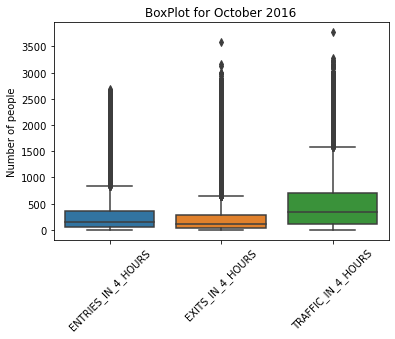

In [76]:
sns.boxplot(data=data_2016_full_summary);
plt.title("BoxPlot for October 2016");
plt.xticks(rotation = 45)
plt.ylabel("Number of people")

plt.savefig('top_10_turnstiles.png')

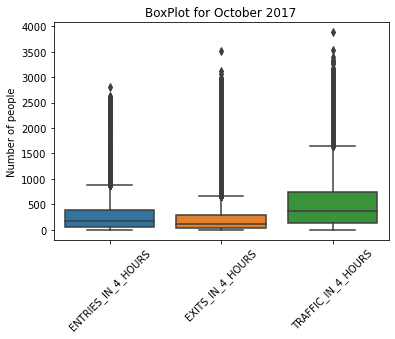

In [77]:
sns.boxplot(data=data_2017_full_summary);
plt.xticks(rotation = 45)
plt.ylabel("Number of people")
plt.title("BoxPlot for October 2017");

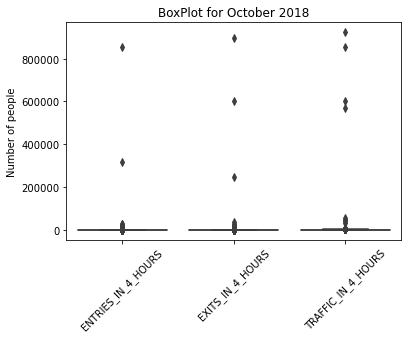

In [78]:
sns.boxplot(data=data_2018_full_summary);
plt.xticks(rotation = 45)
plt.ylabel("Number of people")
plt.title("BoxPlot for October 2018");

from the above Boxplot we can see that the results of 2018 have some problems

But befor saying it is outliers we need to check the data frame.
After checking the data, I found that there were 2 controle areas that has big number of trafic at the same time for many days.
But in 2018 the numbers were abnormal.

In [79]:
print("=========MAX========")
print(data_2017_full_summary.max())
print("=========MEAN========")
print(data_2017_full_summary.mean())
print("=========MIN========")
print(data_2017_full_summary.min())

=========MAX========
C_A                                  R142
UNIT                                 R293
SCP                              05-03-06
STATION                    34 ST-PENN STA
DATE                           10/31/2017
DATE_TIME             2017-10-31 20:00:00
NEW_TIME                         20:00:00
ENTRIES_IN_4_HOURS                   2795
EXITS_IN_4_HOURS                     3508
TRAFFIC_IN_4_HOURS                   3883
dtype: object
=========MEAN========
ENTRIES_IN_4_HOURS    275.920102
EXITS_IN_4_HOURS      236.426323
TRAFFIC_IN_4_HOURS    512.346426
dtype: float64
=========MIN========
C_A                                  N067
UNIT                                 R012
SCP                              00-00-00
STATION                    34 ST-PENN STA
DATE                           10/01/2017
DATE_TIME             2017-10-01 00:00:00
NEW_TIME                         00:00:00
ENTRIES_IN_4_HOURS                      0
EXITS_IN_4_HOURS                        0
TRAFFIC_IN

In [80]:
print("=========MAX========")
print(data_2018_full_summary.max())
print("=========MEAN========")
print(data_2018_full_summary.mean())
print("=========MIN========")
print(data_2018_full_summary.min())

=========MAX========
C_A                                  R142
UNIT                                 R293
SCP                              05-03-06
STATION                    34 ST-PENN STA
DATE                           10/31/2018
DATE_TIME             2018-10-31 20:00:00
NEW_TIME                         20:00:00
ENTRIES_IN_4_HOURS                 852492
EXITS_IN_4_HOURS                   895535
TRAFFIC_IN_4_HOURS                 923432
dtype: object
=========MEAN========
ENTRIES_IN_4_HOURS    378.231215
EXITS_IN_4_HOURS      386.898235
TRAFFIC_IN_4_HOURS    765.129451
dtype: float64
=========MIN========
C_A                                  N067
UNIT                                 R012
SCP                              00-00-00
STATION                    34 ST-PENN STA
DATE                           10/01/2018
DATE_TIME             2018-10-01 00:00:00
NEW_TIME                         00:00:00
ENTRIES_IN_4_HOURS                      0
EXITS_IN_4_HOURS                        0
TRAFFIC_IN

In [81]:
data_2018_full_summary[data_2018_full_summary.TRAFFIC_IN_4_HOURS > 4000]

,C_A,UNIT,SCP,STATION,DATE,DATE_TIME,NEW_TIME,ENTRIES_IN_4_HOURS,EXITS_IN_4_HOURS,TRAFFIC_IN_4_HOURS
2104,N067,R012,00-05-00,34 ST-PENN STA,10/12/2018,2018-10-12 20:00:00,20:00:00,1070.0,2940.0,4010.0
2141,N067,R012,00-05-00,34 ST-PENN STA,10/21/2018,2018-10-21 20:00:00,20:00:00,334.0,8273.0,8607.0
2177,N067,R012,00-05-00,34 ST-PENN STA,10/27/2018,2018-10-27 00:00:00,00:00:00,4878.0,37365.0,42243.0
12189,R137,R031,02-03-01,34 ST-PENN STA,10/28/2018,2018-10-28 20:00:00,20:00:00,318833.0,248083.0,566916.0
13349,R138,R293,00-03-00,34 ST-PENN STA,10/18/2018,2018-10-18 00:00:00,00:00:00,13.0,599689.0,599702.0
13435,R138,R293,00-03-00,34 ST-PENN STA,10/31/2018,2018-10-31 12:00:00,12:00:00,15767.0,15767.0,31534.0
13640,R138,R293,00-03-01,34 ST-PENN STA,10/31/2018,2018-10-31 12:00:00,12:00:00,852492.0,0.0,852492.0
13678,R138,R293,00-03-02,34 ST-PENN STA,10/05/2018,2018-10-05 16:00:00,16:00:00,428.0,3662.0,4090.0
13845,R138,R293,00-03-02,34 ST-PENN STA,10/31/2018,2018-10-31 12:00:00,12:00:00,23438.0,23438.0,46876.0
13883,R138,R293,00-03-03,34 ST-PENN STA,10/05/2018,2018-10-05 16:00:00,16:00:00,415.0,3626.0,4041.0


from the above table we can see the outliers very clear therefore I will excloud the values of the traffic which are more than 4500

In [82]:
data_2018_full_summary = data_2018_full_summary[data_2018_full_summary.TRAFFIC_IN_4_HOURS < 4500]
data_2018_full_summary

,C_A,UNIT,SCP,STATION,DATE,DATE_TIME,NEW_TIME,ENTRIES_IN_4_HOURS,EXITS_IN_4_HOURS,TRAFFIC_IN_4_HOURS
0,N067,R012,00-00-00,34 ST-PENN STA,10/01/2018,2018-10-01 00:00:00,00:00:00,39.0,69.0,108.0
1,N067,R012,00-00-00,34 ST-PENN STA,10/01/2018,2018-10-01 04:00:00,04:00:00,3.0,6.0,9.0
2,N067,R012,00-00-00,34 ST-PENN STA,10/01/2018,2018-10-01 08:00:00,08:00:00,223.0,166.0,389.0
3,N067,R012,00-00-00,34 ST-PENN STA,10/01/2018,2018-10-01 12:00:00,12:00:00,333.0,605.0,938.0
4,N067,R012,00-00-00,34 ST-PENN STA,10/01/2018,2018-10-01 16:00:00,16:00:00,86.0,234.0,320.0
...,...,...,...,...,...,...,...,...,...,...
18439,R142,R293,01-06-01,34 ST-PENN STA,10/31/2018,2018-10-31 04:00:00,04:00:00,4.0,24.0,28.0
18440,R142,R293,01-06-01,34 ST-PENN STA,10/31/2018,2018-10-31 08:00:00,08:00:00,104.0,611.0,715.0
18441,R142,R293,01-06-01,34 ST-PENN STA,10/31/2018,2018-10-31 12:00:00,12:00:00,150.0,410.0,560.0
18442,R142,R293,01-06-01,34 ST-PENN STA,10/31/2018,2018-10-31 16:00:00,16:00:00,248.0,401.0,649.0


The box plote of October 2018 after dropping the outliers

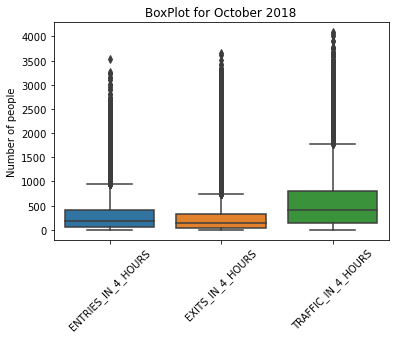

In [83]:
sns.boxplot(data=data_2018_full_summary);
plt.xticks(rotation = 45)
plt.ylabel("Number of people")
plt.title("BoxPlot for October 2018");

Now i will add new column to represent the day of the week.

In [84]:
data_2016_full_summary["DAY_OF_WEEK_NUM"] = pd.to_datetime(data_2016_full_summary["DATE"]).dt.dayofweek
data_2017_full_summary["DAY_OF_WEEK_NUM"] = pd.to_datetime(data_2017_full_summary["DATE"]).dt.dayofweek
data_2018_full_summary["DAY_OF_WEEK_NUM"] = pd.to_datetime(data_2018_full_summary["DATE"]).dt.dayofweek


<ipython-input-84-a5a104584322>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2018_full_summary["DAY_OF_WEEK_NUM"] = pd.to_datetime(data_2018_full_summary["DATE"]).dt.dayofweek


In [85]:
data_2016_full_summary

,C_A,UNIT,SCP,STATION,DATE,DATE_TIME,NEW_TIME,ENTRIES_IN_4_HOURS,EXITS_IN_4_HOURS,TRAFFIC_IN_4_HOURS,DAY_OF_WEEK_NUM
0,N067,R012,00-00-00,34 ST-PENN STA,10/01/2016,2016-10-01 00:00:00,00:00:00,42.0,48.0,90.0,5
1,N067,R012,00-00-00,34 ST-PENN STA,10/01/2016,2016-10-01 04:00:00,04:00:00,5.0,1.0,6.0,5
3,N067,R012,00-00-00,34 ST-PENN STA,10/01/2016,2016-10-01 12:00:00,12:00:00,53.0,1.0,54.0,5
4,N067,R012,00-00-00,34 ST-PENN STA,10/01/2016,2016-10-01 16:00:00,16:00:00,72.0,9.0,81.0,5
5,N067,R012,00-00-00,34 ST-PENN STA,10/01/2016,2016-10-01 20:00:00,20:00:00,64.0,10.0,74.0,5
...,...,...,...,...,...,...,...,...,...,...,...
18324,R142,R293,01-06-01,34 ST-PENN STA,10/31/2016,2016-10-31 04:00:00,04:00:00,3.0,18.0,21.0,0
18325,R142,R293,01-06-01,34 ST-PENN STA,10/31/2016,2016-10-31 08:00:00,08:00:00,108.0,666.0,774.0,0
18326,R142,R293,01-06-01,34 ST-PENN STA,10/31/2016,2016-10-31 12:00:00,12:00:00,146.0,399.0,545.0,0
18327,R142,R293,01-06-01,34 ST-PENN STA,10/31/2016,2016-10-31 16:00:00,16:00:00,307.0,323.0,630.0,0


In [86]:
data_2017_full_summary

,C_A,UNIT,SCP,STATION,DATE,DATE_TIME,NEW_TIME,ENTRIES_IN_4_HOURS,EXITS_IN_4_HOURS,TRAFFIC_IN_4_HOURS,DAY_OF_WEEK_NUM
0,N067,R012,00-00-00,34 ST-PENN STA,10/01/2017,2017-10-01 00:00:00,00:00:00,52.0,131.0,183.0,6
1,N067,R012,00-00-00,34 ST-PENN STA,10/01/2017,2017-10-01 04:00:00,04:00:00,10.0,23.0,33.0,6
2,N067,R012,00-00-00,34 ST-PENN STA,10/01/2017,2017-10-01 08:00:00,08:00:00,8.0,43.0,51.0,6
3,N067,R012,00-00-00,34 ST-PENN STA,10/01/2017,2017-10-01 12:00:00,12:00:00,81.0,236.0,317.0,6
4,N067,R012,00-00-00,34 ST-PENN STA,10/01/2017,2017-10-01 16:00:00,16:00:00,116.0,329.0,445.0,6
...,...,...,...,...,...,...,...,...,...,...,...
18423,R142,R293,01-06-01,34 ST-PENN STA,10/31/2017,2017-10-31 04:00:00,04:00:00,1.0,23.0,24.0,1
18424,R142,R293,01-06-01,34 ST-PENN STA,10/31/2017,2017-10-31 08:00:00,08:00:00,97.0,592.0,689.0,1
18425,R142,R293,01-06-01,34 ST-PENN STA,10/31/2017,2017-10-31 12:00:00,12:00:00,152.0,396.0,548.0,1
18426,R142,R293,01-06-01,34 ST-PENN STA,10/31/2017,2017-10-31 16:00:00,16:00:00,246.0,358.0,604.0,1


In [87]:
data_2018_full_summary

,C_A,UNIT,SCP,STATION,DATE,DATE_TIME,NEW_TIME,ENTRIES_IN_4_HOURS,EXITS_IN_4_HOURS,TRAFFIC_IN_4_HOURS,DAY_OF_WEEK_NUM
0,N067,R012,00-00-00,34 ST-PENN STA,10/01/2018,2018-10-01 00:00:00,00:00:00,39.0,69.0,108.0,0
1,N067,R012,00-00-00,34 ST-PENN STA,10/01/2018,2018-10-01 04:00:00,04:00:00,3.0,6.0,9.0,0
2,N067,R012,00-00-00,34 ST-PENN STA,10/01/2018,2018-10-01 08:00:00,08:00:00,223.0,166.0,389.0,0
3,N067,R012,00-00-00,34 ST-PENN STA,10/01/2018,2018-10-01 12:00:00,12:00:00,333.0,605.0,938.0,0
4,N067,R012,00-00-00,34 ST-PENN STA,10/01/2018,2018-10-01 16:00:00,16:00:00,86.0,234.0,320.0,0
...,...,...,...,...,...,...,...,...,...,...,...
18439,R142,R293,01-06-01,34 ST-PENN STA,10/31/2018,2018-10-31 04:00:00,04:00:00,4.0,24.0,28.0,2
18440,R142,R293,01-06-01,34 ST-PENN STA,10/31/2018,2018-10-31 08:00:00,08:00:00,104.0,611.0,715.0,2
18441,R142,R293,01-06-01,34 ST-PENN STA,10/31/2018,2018-10-31 12:00:00,12:00:00,150.0,410.0,560.0,2
18442,R142,R293,01-06-01,34 ST-PENN STA,10/31/2018,2018-10-31 16:00:00,16:00:00,248.0,401.0,649.0,2


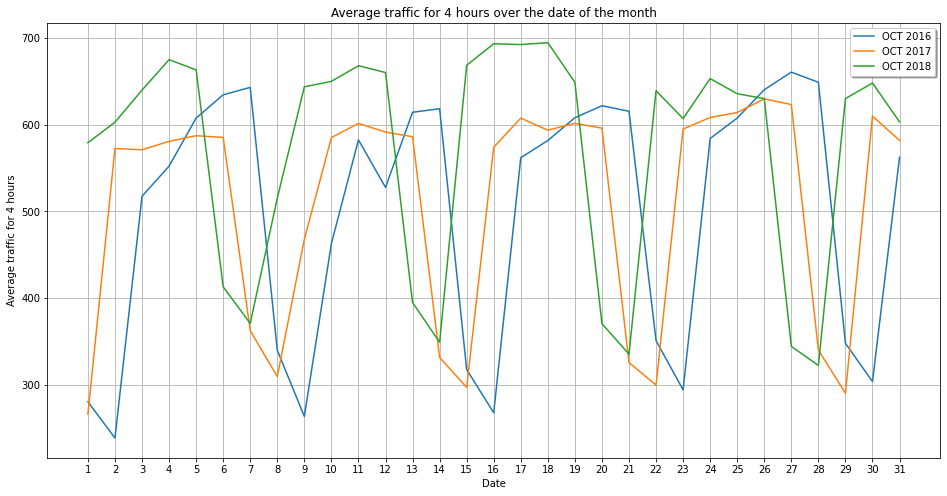

In [88]:
plt.figure(figsize=(16,8))
x = list(range(1,32))
plt.plot(np.array(x),data_2016_full_summary.groupby("DATE")['TRAFFIC_IN_4_HOURS'].mean())
plt.plot(np.array(x),data_2017_full_summary.groupby("DATE")['TRAFFIC_IN_4_HOURS'].mean())
plt.plot(np.array(x),data_2018_full_summary.groupby("DATE")['TRAFFIC_IN_4_HOURS'].mean())
plt.ylabel('Average traffic for 4 hours')
plt.xlabel('Date')
ticks_x = np.linspace(1, 31, 31)
plt.grid()
plt.xticks(ticks_x);
plt.legend(['OCT 2016','OCT 2017','OCT 2018'],shadow = True, loc = 0);
plt.title('Average traffic for 4 hours over the date of the month');

The above plot showes sharp drop in the average traffic at 2 days, which represent the weekend but to prove that, the next plot will show the average traffic over the days of the week.

The average Traffic per day of the week is shown bellow

In [89]:
data_2016_week_mean = data_2016_full_summary.groupby('DAY_OF_WEEK_NUM')['TRAFFIC_IN_4_HOURS'].mean().reset_index().sort_values('DAY_OF_WEEK_NUM')
data_2016_week_mean

,DAY_OF_WEEK_NUM,TRAFFIC_IN_4_HOURS
0,0,537.371833
1,1,580.816261
2,2,595.560501
3,3,632.608291
4,4,631.560704
5,5,326.679775
6,6,273.040212


In [90]:
data_2017_week_mean = data_2017_full_summary.groupby('DAY_OF_WEEK_NUM')['TRAFFIC_IN_4_HOURS'].mean().reset_index().sort_values('DAY_OF_WEEK_NUM')
data_2017_week_mean

,DAY_OF_WEEK_NUM,TRAFFIC_IN_4_HOURS
0,0,563.528244
1,1,590.644815
2,2,597.393123
3,3,602.453376
4,4,597.656351
5,5,339.909702
6,6,292.199200


In [91]:
data_2018_week_mean = data_2018_full_summary.groupby('DAY_OF_WEEK_NUM')['TRAFFIC_IN_4_HOURS'].mean().reset_index().sort_values('DAY_OF_WEEK_NUM')
data_2018_week_mean

,DAY_OF_WEEK_NUM,TRAFFIC_IN_4_HOURS
0,0,605.133308
1,1,638.250668
2,2,648.211980
3,3,668.092118
4,4,650.704502
5,5,380.407426
6,6,344.094601


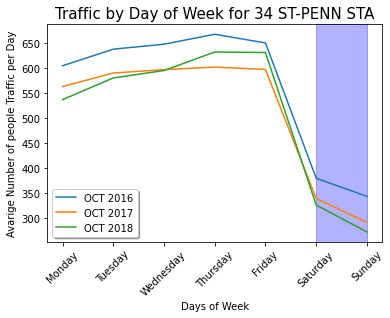

In [92]:
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday","Saturday","Sunday"]
plt.plot(days,data_2018_week_mean.TRAFFIC_IN_4_HOURS);
plt.plot(days,data_2017_week_mean.TRAFFIC_IN_4_HOURS);
plt.plot(days,data_2016_week_mean.TRAFFIC_IN_4_HOURS);

plt.xlabel('Days of Week', fontsize = 10)
plt.ylabel('Avarige Number of people Traffic per Day', fontsize = 10)
plt.xticks(rotation = 45)
plt.title('Traffic by Day of Week for 34 ST-PENN STA', fontsize = 15)
plt.axvspan(5,6, color = "b" , alpha = 0.3)
plt.legend(['OCT 2016','OCT 2017','OCT 2018'],shadow = True, loc = 0);

plt.savefig('weekly.png')

From the figure above we can see that the traffic on the weekend is the lowest, which means this station is in a business area.

In [93]:
data_2016_34ST_station_TIME = data_2016_full_summary.groupby('NEW_TIME')['TRAFFIC_IN_4_HOURS'].sum().reset_index().sort_values('NEW_TIME')

data_2016_34ST_station_TIME

,NEW_TIME,TRAFFIC_IN_4_HOURS
0,00:00:00,769501.0
1,04:00:00,126410.0
2,08:00:00,1222994.0
3,12:00:00,1900205.0
4,16:00:00,1824899.0
5,20:00:00,2460445.0


In [94]:
data_2017_34ST_station_TIME = data_2017_full_summary.groupby('NEW_TIME')['TRAFFIC_IN_4_HOURS'].sum().reset_index().sort_values('NEW_TIME')

data_2017_34ST_station_TIME

,NEW_TIME,TRAFFIC_IN_4_HOURS
0,00:00:00,787929.0
1,04:00:00,132332.0
2,08:00:00,1250929.0
3,12:00:00,1913468.0
4,16:00:00,1784822.0
5,20:00:00,2530952.0


In [95]:
data_2018_34ST_station_TIME = data_2018_full_summary.groupby('NEW_TIME')['TRAFFIC_IN_4_HOURS'].sum().reset_index().sort_values('NEW_TIME')

data_2018_34ST_station_TIME

,NEW_TIME,TRAFFIC_IN_4_HOURS
0,00:00:00,841044.0
1,04:00:00,136188.0
2,08:00:00,1305930.0
3,12:00:00,2097326.0
4,16:00:00,2046217.0
5,20:00:00,2716688.0


In [96]:
data_2016_C_A_traffic = data_2016_full_summary.copy()
data_2016_C_A_traffic = data_2016_C_A_traffic.drop(["EXITS_IN_4_HOURS","ENTRIES_IN_4_HOURS","DAY_OF_WEEK_NUM","STATION","DATE_TIME","DATE"] , axis = 1, errors="ignore")
data_2016_C_A_traffic = data_2016_C_A_traffic.groupby(by = ["C_A"]).mean()
data_2016_C_A_traffic.rename(columns = {'TRAFFIC_IN_4_HOURS': 'TRAFFIC_OCT_2016'}, inplace = True)
data_2016_C_A_traffic

,TRAFFIC_OCT_2016
C_A,
N067,444.974822
N068,415.893151
N069,365.008163
N070,450.148982
N071,364.223732
N072,470.402259
N073,376.750000
R135,761.377153
R137,545.636364


In [97]:
data_2017_C_A_traffic = data_2017_full_summary.copy()
data_2017_C_A_traffic = data_2017_C_A_traffic.drop(["EXITS_IN_4_HOURS","ENTRIES_IN_4_HOURS","DAY_OF_WEEK_NUM","STATION","DATE_TIME","DATE"] , axis = 1, errors="ignore")
data_2017_C_A_traffic = data_2017_C_A_traffic.groupby(by = ["C_A"]).mean()
data_2017_C_A_traffic.rename(columns = {'TRAFFIC_IN_4_HOURS': 'TRAFFIC_OCT_2017'}, inplace = True)
data_2017_C_A_traffic

,TRAFFIC_OCT_2017
C_A,
N067,547.270851
N068,411.695238
N069,424.496552
N070,466.913369
N071,372.185252
N072,478.758356
N073,367.183673
R135,718.073703
R137,538.114114


In [98]:
data_2018_C_A_traffic = data_2018_full_summary.copy()
data_2018_C_A_traffic = data_2018_C_A_traffic.drop(["EXITS_IN_4_HOURS","ENTRIES_IN_4_HOURS","DAY_OF_WEEK_NUM","STATION","DATE_TIME","DATE"] , axis = 1, errors="ignore")
data_2018_C_A_traffic = data_2018_C_A_traffic.groupby(by = ["C_A"]).mean()
data_2018_C_A_traffic.rename(columns = {'TRAFFIC_IN_4_HOURS': 'TRAFFIC_OCT_2018'}, inplace = True)
data_2018_C_A_traffic

,TRAFFIC_OCT_2018
C_A,
N067,571.764425
N068,456.332429
N069,436.715847
N070,487.969892
N071,406.291403
N072,493.782095
N073,410.244648
R135,872.459091
R137,581.370149


In [99]:
data_C_A_traffic_merge = data_2016_C_A_traffic.merge(data_2017_C_A_traffic,on='C_A').merge(data_2018_C_A_traffic,on='C_A')
data_C_A_traffic_merge

,TRAFFIC_OCT_2016,TRAFFIC_OCT_2017,TRAFFIC_OCT_2018
C_A,,,
N067,444.974822,547.270851,571.764425
N068,415.893151,411.695238,456.332429
N069,365.008163,424.496552,436.715847
N070,450.148982,466.913369,487.969892
N071,364.223732,372.185252,406.291403
N072,470.402259,478.758356,493.782095
N073,376.750000,367.183673,410.244648
R135,761.377153,718.073703,872.459091
R137,545.636364,538.114114,581.370149


The above table represents the average traffic for 4 hours per control area.
the heat map for it is shown bellow 

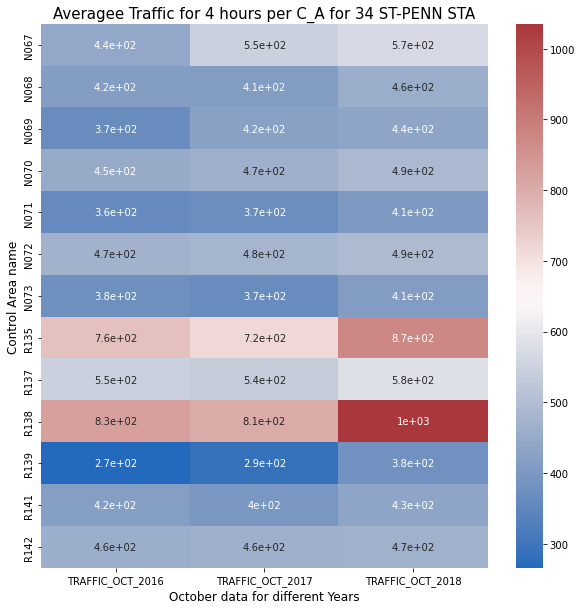

In [100]:
plt.figure(figsize = [10,10])
sns.heatmap(data_C_A_traffic_merge, cmap = "vlag" , annot = True);
plt.xlabel('October data for different Years', fontsize = 12)
plt.ylabel('Control Area name', fontsize = 12)
plt.title('Averagee Traffic for 4 hours per C_A for 34 ST-PENN STA', fontsize = 15);

From the above heatmap, it is clear that the most crowded Control areas are R138 and R135.

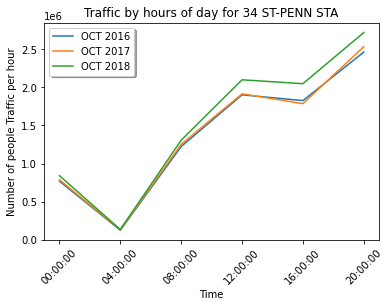

In [101]:
plt.plot(data_2016_34ST_station_TIME.NEW_TIME,data_2016_34ST_station_TIME.TRAFFIC_IN_4_HOURS);
plt.plot(data_2017_34ST_station_TIME.NEW_TIME,data_2017_34ST_station_TIME.TRAFFIC_IN_4_HOURS);
plt.plot(data_2018_34ST_station_TIME.NEW_TIME,data_2018_34ST_station_TIME.TRAFFIC_IN_4_HOURS);

plt.xlabel('Time', fontsize = 10)
plt.ylabel('Number of people Traffic per hour', fontsize = 10)
plt.xticks(rotation = 45)
plt.title('Traffic by hours of day for 34 ST-PENN STA', fontsize = 12)
plt.legend(['OCT 2016','OCT 2017','OCT 2018'],shadow = True, loc = 0);

plt.savefig('hourly.png')

In [102]:
data_2016_groupby_C_A_TIME = data_2016_full_summary.groupby(by = ["C_A", "NEW_TIME"]).mean()
data_2016_groupby_C_A_TIME

ENTRIES_IN_4_HOURS  EXITS_IN_4_HOURS  TRAFFIC_IN_4_HOURS  \
C_A  NEW_TIME                                                             
N067 00:00:00          153.293532        134.305970          287.599502   
     04:00:00           23.622642         20.185984           43.808625   
     08:00:00          195.593985         96.847118          292.441103   
     12:00:00          430.602978        240.260546          670.863524   
     16:00:00          201.767327        268.257426          470.024752   
...                           ...               ...                 ...   
R142 04:00:00           10.361446         28.524096           38.885542   
     08:00:00          112.059459        456.886486          568.945946   
     12:00:00          248.767568        389.891892          638.659459   
     16:00:00          438.225806        350.827957          789.053763   
     20:00:00          333.740541        192.000000          525.740541   

               DAY_OF_WEEK_NUM  
C_A  NEW_TIME                   
N067 00:00:00         3.097015  
     04:00:00         3.123989  
     08:00:00         3.037594  
     12:00:00         3.064516  
     16:00:00         3.069307  
...                        ...  
R142 04:00:00         3.108434  
     08:00:00         3.075676  
     12:00:00         3.054054  
     16:00:00         3.064516  
     20:00:00         3.054054  

[78 rows x 4 columns]

In [103]:
data_2017_groupby_C_A_TIME = data_2017_full_summary.groupby(by = ["C_A", "NEW_TIME"]).mean()
data_2017_groupby_C_A_TIME

ENTRIES_IN_4_HOURS  EXITS_IN_4_HOURS  TRAFFIC_IN_4_HOURS  \
C_A  NEW_TIME                                                             
N067 00:00:00          220.730673        180.877805          401.608479   
     04:00:00           28.265416         26.884718           55.150134   
     08:00:00          215.124688        117.214464          332.339152   
     12:00:00          498.757426        317.626238          816.383663   
     16:00:00          268.447570        335.680307          604.127877   
...                           ...               ...                 ...   
R142 04:00:00            8.603774         32.484277           41.088050   
     08:00:00          117.899441        476.139665          594.039106   
     12:00:00          240.044444        382.933333          622.977778   
     16:00:00          418.173184        345.111732          763.284916   
     20:00:00          355.257143        217.188571          572.445714   

               DAY_OF_WEEK_NUM  
C_A  NEW_TIME                   
N067 00:00:00         2.952618  
     04:00:00         3.058981  
     08:00:00         2.912718  
     12:00:00         2.935644  
     16:00:00         3.035806  
...                        ...  
R142 04:00:00         2.918239  
     08:00:00         2.938547  
     12:00:00         2.933333  
     16:00:00         2.938547  
     20:00:00         2.880000  

[78 rows x 4 columns]

In [104]:
data_2018_groupby_C_A_TIME = data_2018_full_summary.groupby(by = ["C_A", "NEW_TIME"]).mean()
data_2018_groupby_C_A_TIME

ENTRIES_IN_4_HOURS  EXITS_IN_4_HOURS  TRAFFIC_IN_4_HOURS  \
C_A  NEW_TIME                                                             
N067 00:00:00          206.299720        161.789916          368.089636   
     04:00:00           18.889231         19.233846           38.123077   
     08:00:00          250.949296        119.521127          370.470423   
     12:00:00          575.292958        299.436620          874.729577   
     16:00:00          284.912181        342.031161          626.943343   
...                           ...               ...                 ...   
R142 04:00:00           10.150602         35.481928           45.632530   
     08:00:00          116.643243        474.756757          591.400000   
     12:00:00          250.946237        387.602151          638.548387   
     16:00:00          442.204301        357.586022          799.790323   
     20:00:00          323.637838        200.005405          523.643243   

               DAY_OF_WEEK_NUM  
C_A  NEW_TIME                   
N067 00:00:00         2.722689  
     04:00:00         2.781538  
     08:00:00         2.738028  
     12:00:00         2.721127  
     16:00:00         2.745042  
...                        ...  
R142 04:00:00         2.819277  
     08:00:00         2.794595  
     12:00:00         2.806452  
     16:00:00         2.806452  
     20:00:00         2.794595  

[78 rows x 4 columns]

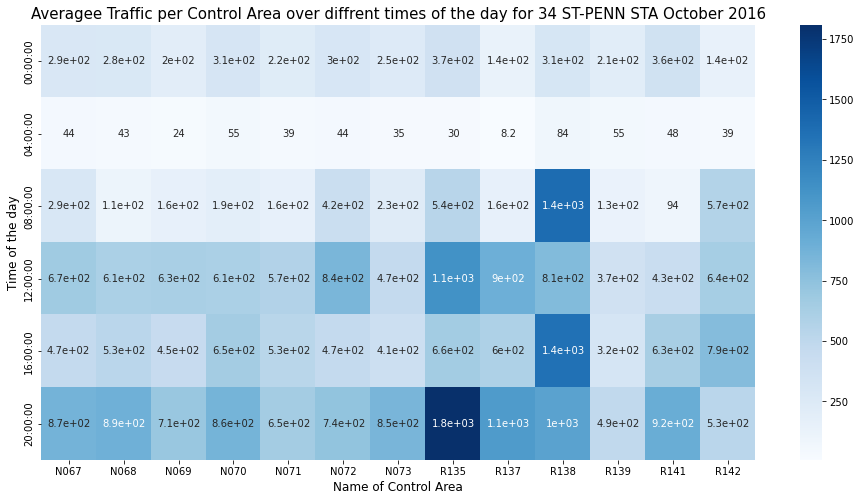

In [105]:
data_2016_groupby_C_A_TIME = data_2016_groupby_C_A_TIME.TRAFFIC_IN_4_HOURS.unstack(0)
plt.figure(figsize = [16,8])
sns.heatmap(data_2016_groupby_C_A_TIME, cmap='Blues', annot = True)
plt.xlabel('Name of Control Area', fontsize = 12)
plt.ylabel('Time of the day', fontsize = 12)
plt.title('Averagee Traffic per Control Area over diffrent times of the day for 34 ST-PENN STA October 2016', fontsize = 15);

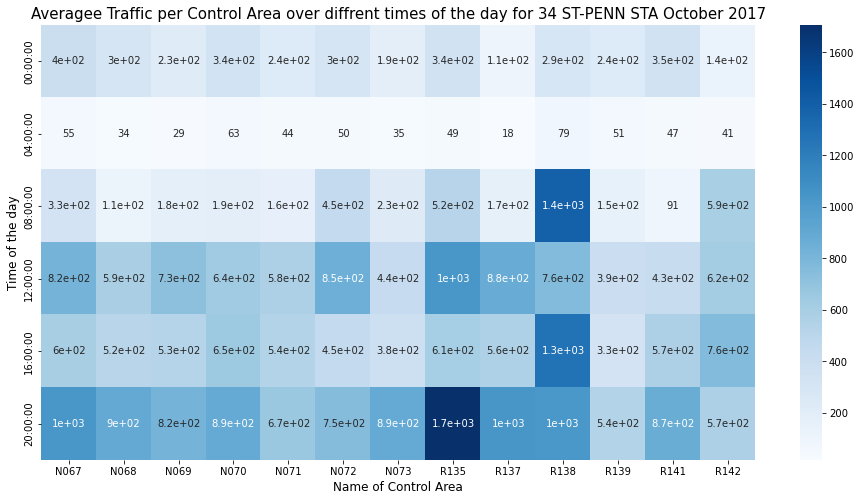

In [106]:
data_2017_groupby_C_A_TIME = data_2017_groupby_C_A_TIME.TRAFFIC_IN_4_HOURS.unstack(0)
plt.figure(figsize = [16,8])
sns.heatmap(data_2017_groupby_C_A_TIME, cmap='Blues', annot = True)
plt.xlabel('Name of Control Area', fontsize = 12)
plt.ylabel('Time of the day', fontsize = 12)
plt.title('Averagee Traffic per Control Area over diffrent times of the day for 34 ST-PENN STA October 2017', fontsize = 15);

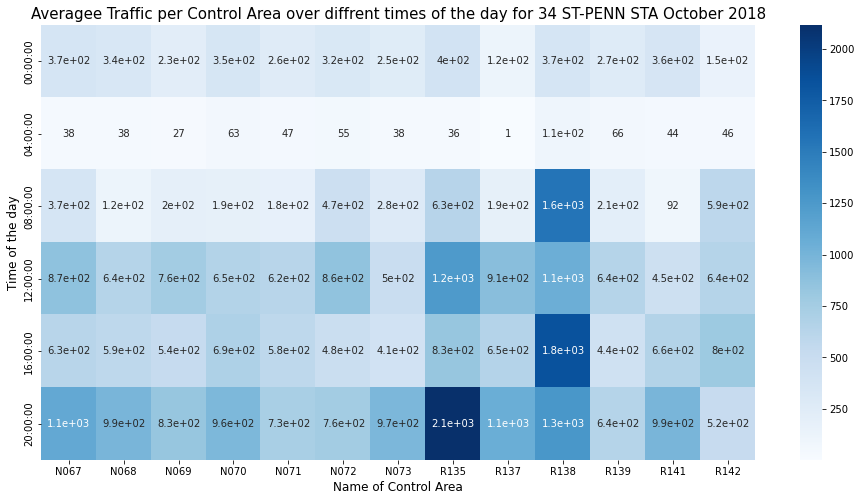

In [107]:
data_2018_groupby_C_A_TIME = data_2018_groupby_C_A_TIME.TRAFFIC_IN_4_HOURS.unstack(0)
plt.figure(figsize = [16,8])
sns.heatmap(data_2018_groupby_C_A_TIME, cmap='Blues', annot = True)
plt.xlabel('Name of Control Area', fontsize = 12)
plt.ylabel('Time of the day', fontsize = 12)
plt.title('Averagee Traffic per Control Area over diffrent times of the day for 34 ST-PENN STA October 2018', fontsize = 15);